# CS245 Big Data Analytics - Assignment 2
## Deadline: 11:59PM (midnight), November 21, 2025

## Instructions
Each assignment is structured as a Jupyter notebook, offering interactive tutorials that align with our lectures. You will encounter two types of problems: *write-up problems* and *coding problems*.

1. **Write-up Problems:** These problems are primarily theoretical, requiring you to demonstrate your understanding of lecture concepts and to provide mathematical proofs for key theorems. Your answers should include sufficient steps for the mathematical derivations.
2. **Coding Problems:** Here, you will be engaging with practical coding tasks. These may involve completing code segments provided in the notebooks or developing models from scratch.

To ensure clarity and consistency in your submissions, please adhere to the following guidelines:

* For write-up problems, use Markdown bullet points to format text answers. Also, express all mathematical equations using $\LaTeX$ and avoid plain text such as `x0`, `x^1`, or `R x Q` for equations.
* For coding problems, comment on your code thoroughly for readability and ensure your code is executable. Non-runnable code may lead to a loss of **all** points. Coding problems have automated grading, and altering the grading code will result in a deduction of **all** points.
* Your submission should show the entire process of data loading, preprocessing, model implementation, training, and result analysis. This can be achieved through a mix of explanatory text cells, inline comments, intermediate result displays, and experimental visualizations.

### Collaboration and Integrity

* Collaboration is encouraged, but all final submissions must be your own work. Please acknowledge any collaboration or external sources used, including websites, papers, GitHub repositories, and large language models.
* Any suspicious cases of academic misconduct will be reported to The Office of the Dean of Students.

## Before You Start

Useful information about managing environments can be found [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

You may also quickly review the usage of basic Python and Numpy package, if needed in coding for matrix operations.

In this notebook, you must not delete any code cells in this notebook. If you change any code outside the blocks that you are allowed to edit (between `START/END YOUR CODE HERE`), you need to highlight these changes. You may add some additional cells to help explain your results and observations.

## Part 1: KMeans (40 points + 10 bonus points)

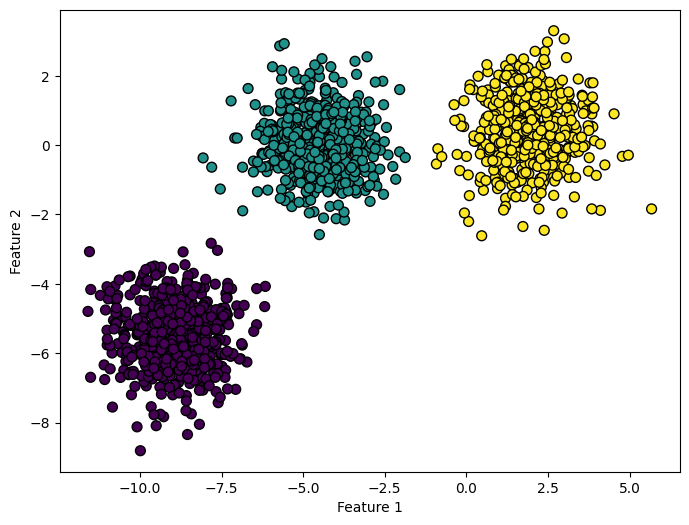

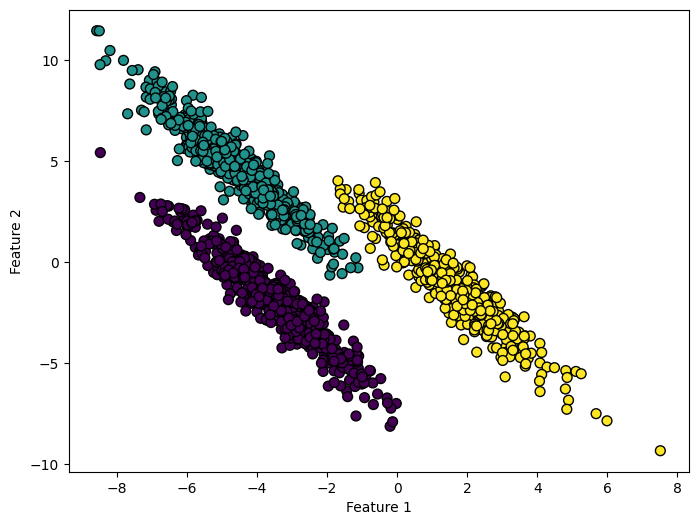

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

n_samples = 1500
random_state = 170
transformation = [[1, -1], [-1, 2]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

X = np.dot(X, transformation)  # Anisotropic blobs

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Problem 1.1: L2 Mutual Distances (5 points)

In this problem, you will implement functions to calculate the L2 mutual distances between two sets of points.

Instructions:
- Implement the `l2_mutual_distance` function to calculate the L2 mutual distances between points in `X` and `Y`.
- Visualize the similarity matrices using hierarchical clustering with `seaborn.clustermap`.

Hints:
- An example implementation of `l1_mutual_distance` function to calculate the L1 mutual distances has been provided.
- Use `np.expand_dims` to add new dimensions to the arrays for broadcasting.
- Use `np.abs` for L1 distance and `np.square` for L2 distance.
- Use `np.sum` with `axis=-1` to sum along the last dimension.

/Users/noahpang/.pyenv/versions/3.9/envs/CS245HW1/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/noahpang/.pyenv/versions/3.9/envs/CS245HW1/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


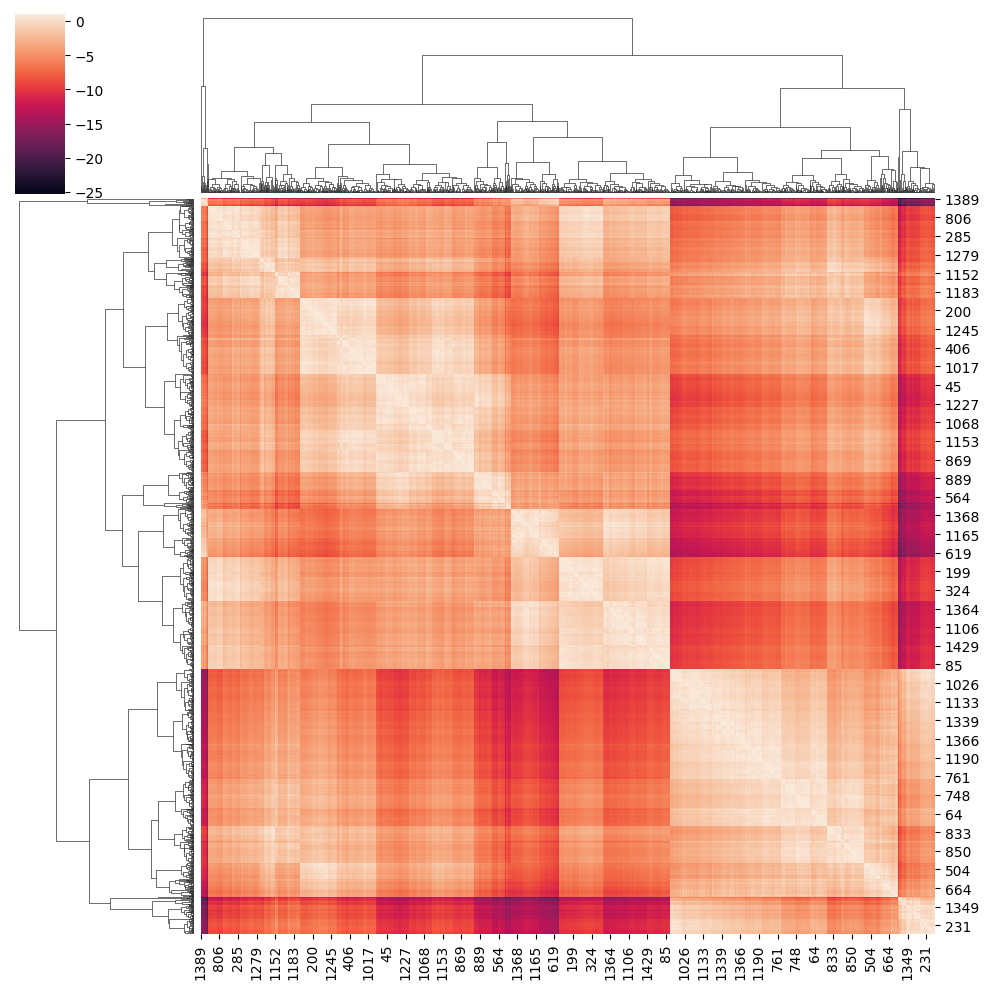

/Users/noahpang/.pyenv/versions/3.9/envs/CS245HW1/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/noahpang/.pyenv/versions/3.9/envs/CS245HW1/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


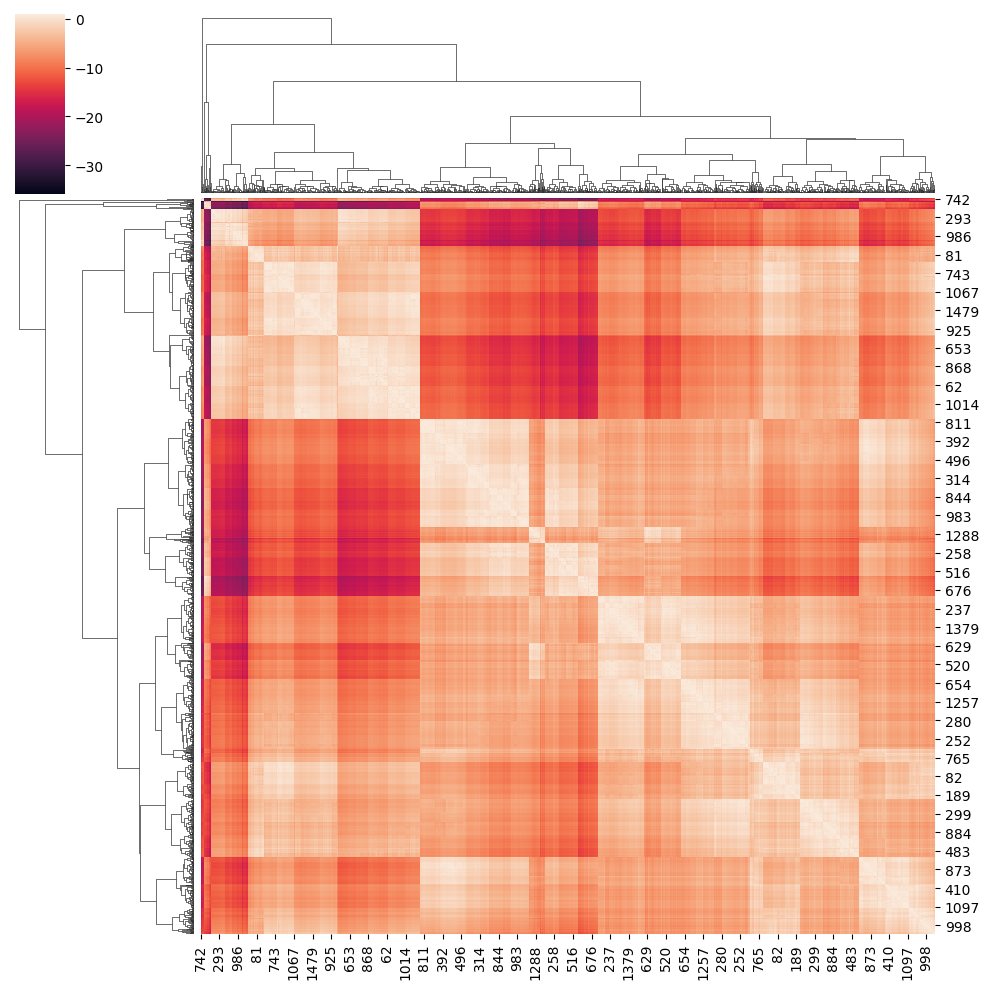

In [ ]:
def l1_mutual_distance(X, Y):
    """
        X: ndarray [s, ndim]
        Y: ndarray [t, ndim]
    """
    X_expand = np.expand_dims(X, axis=1) # X_expand: [s, 1, ndim]
    Y_expand = np.expand_dims(Y, axis=0) # Y_expand: [1, t, ndim]
    mutual_square = np.abs(X_expand - Y_expand) # [s, t, ndim]
    return mutual_square.sum(axis=-1) # [s, t]


def l2_mutual_distance(X, Y):
    """
        X: ndarray [s, ndim]
        Y: ndarray [t, ndim]
    """
    # START YOUR CODE HERE
    X_expand = np.expand_dims(X, axis=1)
    Y_expand = np.expand_dims(Y, axis=0)
    mutual_square = np.square(X_expand - Y_expand)
    # END YOUR CODE HERE

    return np.sqrt(mutual_square.sum(axis=-1))

# Visualize similarity matrices using hierarchical clustering
sim = 1 - l2_mutual_distance(X, X)
sns.clustermap(sim)
plt.show()

sim = 1 - l1_mutual_distance(X, X)
sns.clustermap(sim)
plt.show()

### Problem 1.2: KMeans Clustering with L2 Distance (10 points)

In this problem, you will implement the KMeans clustering algorithm using L2 distance.

Instructions:
- Complete the `k_means_clustering` function to perform KMeans clustering on the input data `X` with `k` clusters.
- Implement the assignment step to assign each point to the nearest centroid.
- Implement the update step to update the centroids based on the assigned points.
- Repeat the assignment and update steps until convergence or maximum iterations are reached.
- Plot the average distance to cluster centers over iterations.
- Apply the implemented KMeans clustering on the provided dataset and visualize the results.

Hints:
- Use `np.argmin` to find the index of the nearest centroid for each point.
- Use `np.mean` to update the centroids based on the assigned points.
- Use `np.all` to check for convergence.

Stop at iter 24


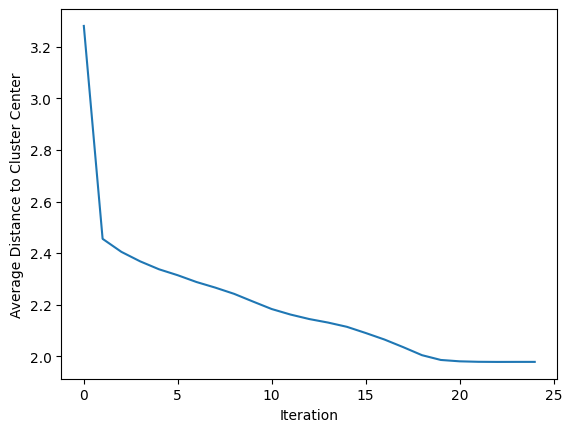

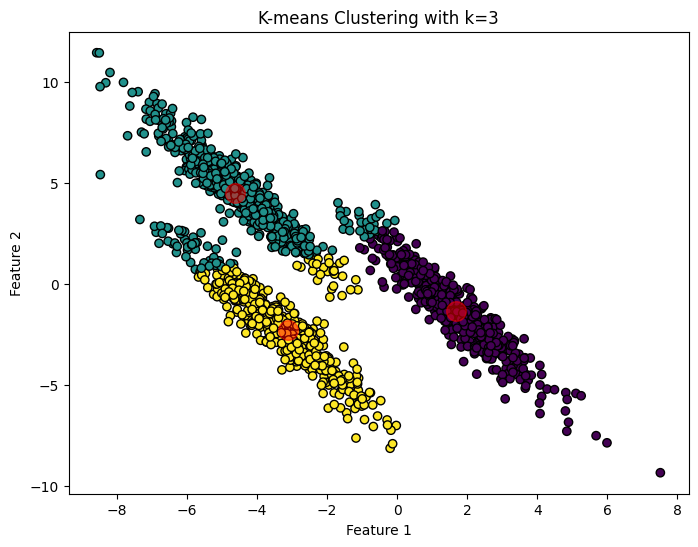

In [ ]:
def k_means_clustering(X, k, max_iters=100):
    # Step 1: Initialize centroids randomly from the data points
    indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[indices]
    distance_per_iteration = []

    for iter_idx in range(max_iters):
        # Step 2: Assignment step
        distances = l2_mutual_distance(X, centroids)  # Calculate distances between X and centroids
        # START YOUR CODE HERE
        closest_cluster = []
        cluster_distances = []
        for X_index, X_row in enumerate(distances):
            centroid_index = np.argmin(X_row)
            closest_cluster.append(centroid_index)
            cluster_distances.append(X_row[centroid_index])
        distance_per_iteration.append(np.mean(cluster_distances))
        # END YOUR CODE HERE


        # Step 3: Update step
        # START YOUR CODE HERE
        new_centroids = np.empty((k, X.shape[1]))
        for cluster_index in range(k):
            input_indices = [i for i, c in enumerate(closest_cluster) if c == cluster_index]
            cluster = X[input_indices]
            if cluster.size > 0:
                new_centroids[cluster_index] = np.mean(cluster, axis=0)
            else:
                new_centroids[cluster_index] = centroids[cluster_index]
        # END YOUR CODE HERE


        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            print('Stop at iter %d' % iter_idx)
            break

        centroids = new_centroids

    plt.plot(distance_per_iteration)
    plt.xlabel('Iteration')
    plt.ylabel('Average Distance to Cluster Center')
    plt.show()

    return closest_cluster, centroids

# Apply K-means to the two-moons dataset with k=2
k = 3
clusters_kmeans, centroids_kmeans = k_means_clustering(X, k)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters_kmeans, cmap='viridis', edgecolors='k')
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', s=200, alpha=0.5)
plt.title("K-means Clustering with k=%d" % k)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Problem 1.3: Parameter Studies (15 points)

For each of the below questions, provide your code and a brief explanation.

1. Try running K-Means with different values of `n_clusters`. How does the final "average distance" change with different `n_clusters`? Why? What if we set `n_clusters = n_points`, what is the lowest average distance in that case?

2. Use `from sklearn.metrics import silhouette_samples, silhouette_score` to determine the optimal `n_clusters` for this problem. You can refer to the [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py) for guidance.

3. Try running KMeans with different initialization (random seeds) and record the centroids over 10 rounds. Plot these centroids using `plt.scatter`. Are they the same? Why?

Stop at iter 1


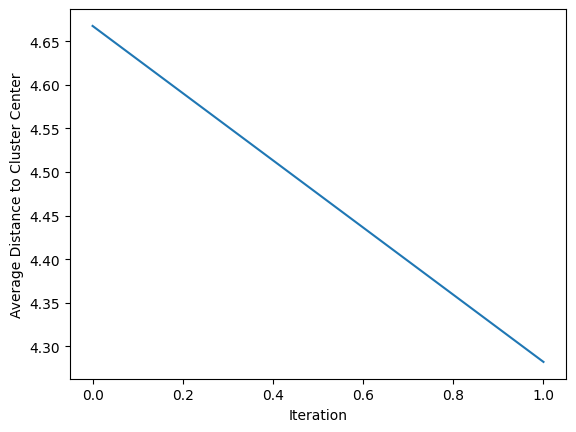

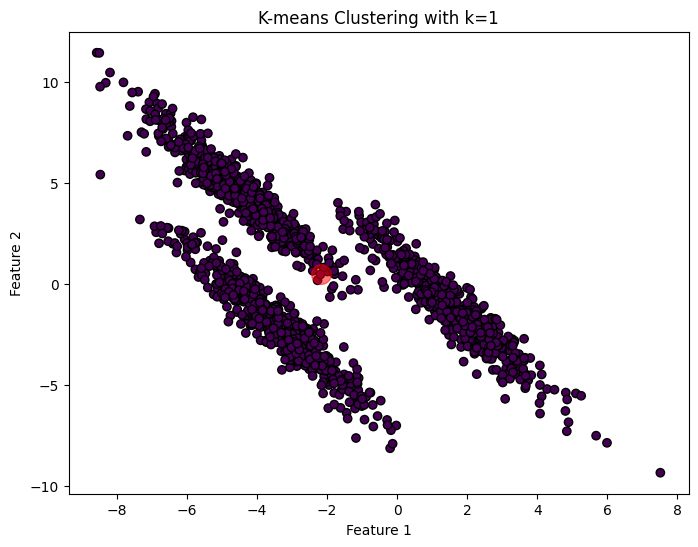

Stop at iter 11


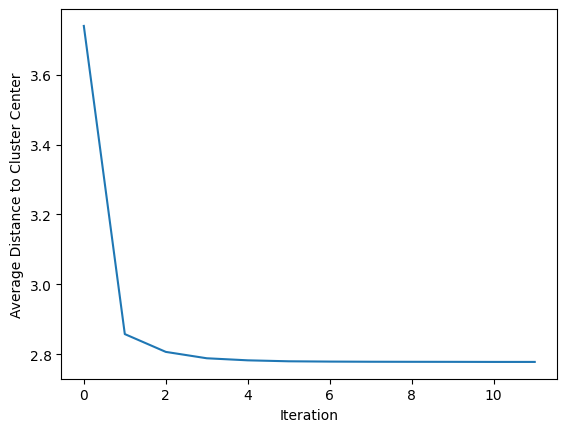

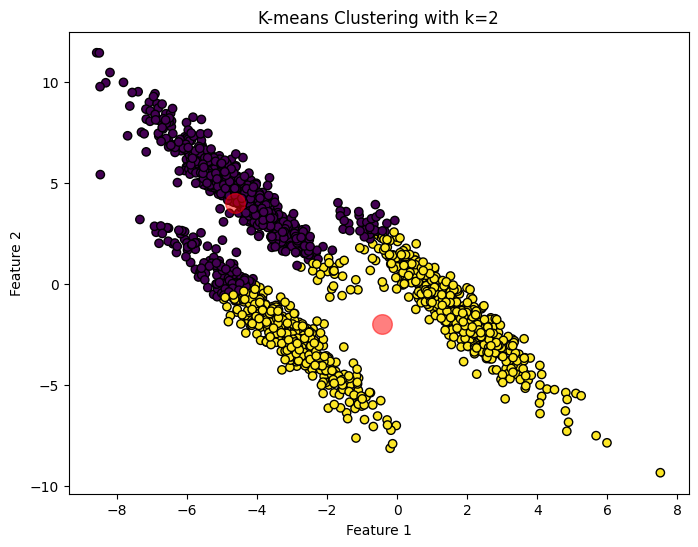

Stop at iter 10


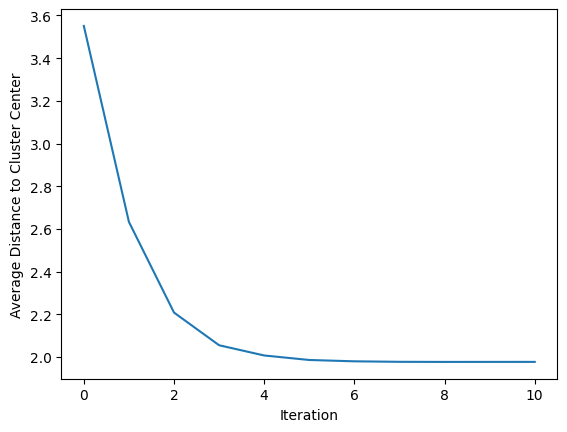

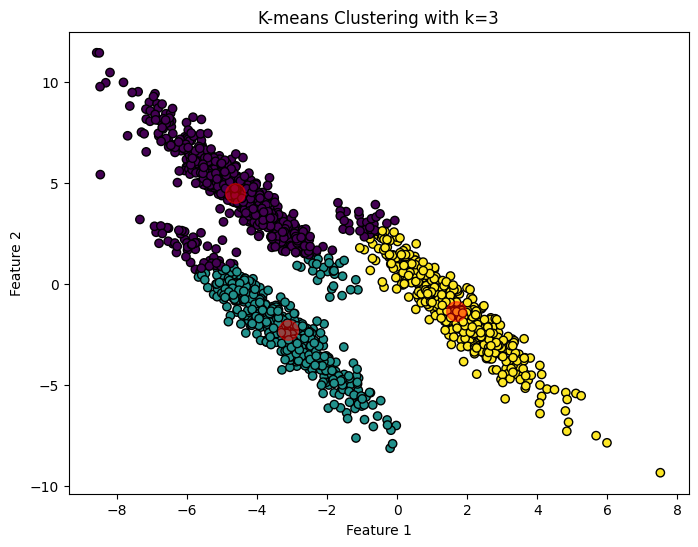

Stop at iter 17


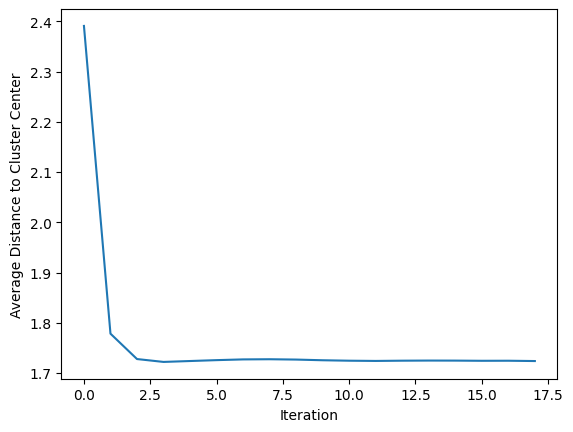

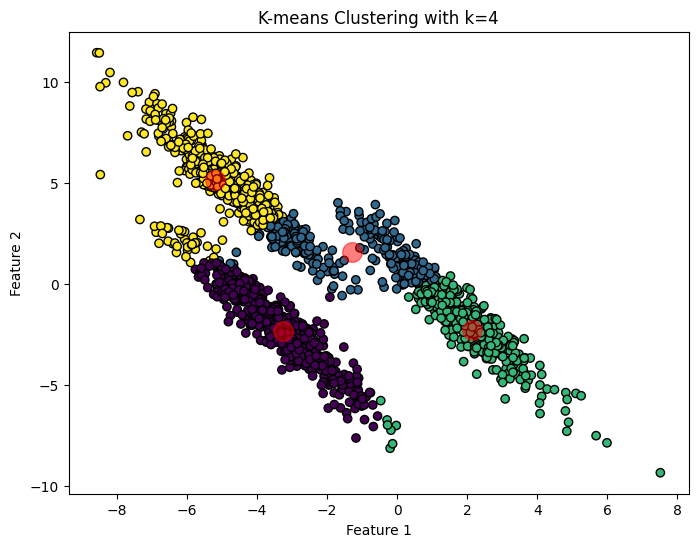

Stop at iter 26


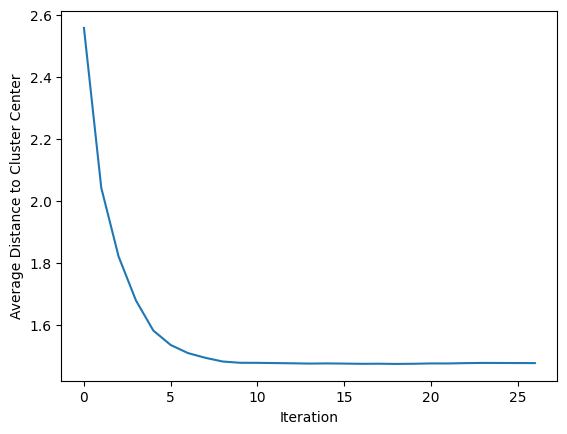

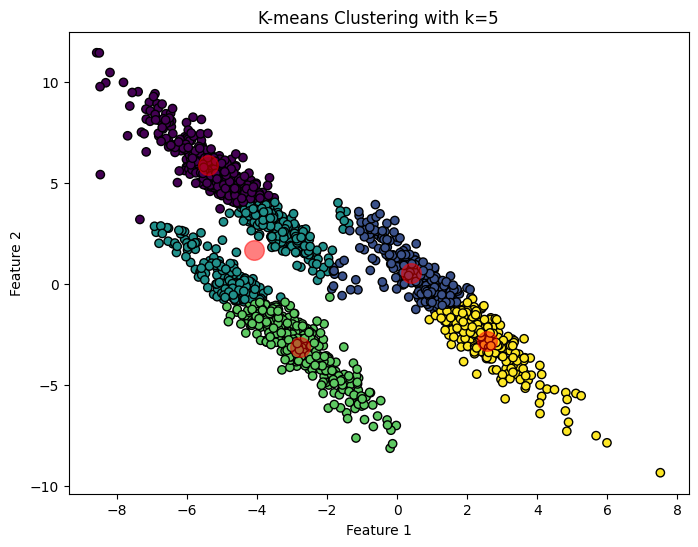

Stop at iter 23


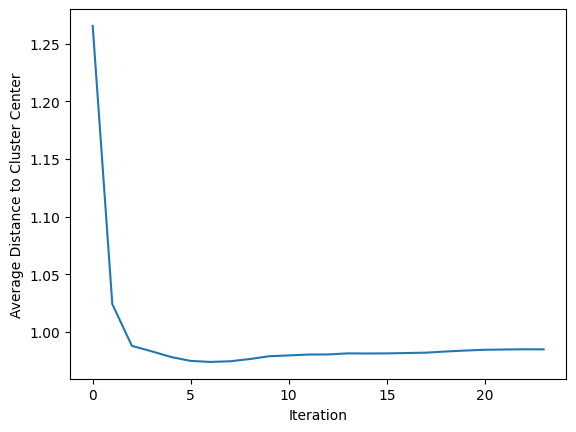

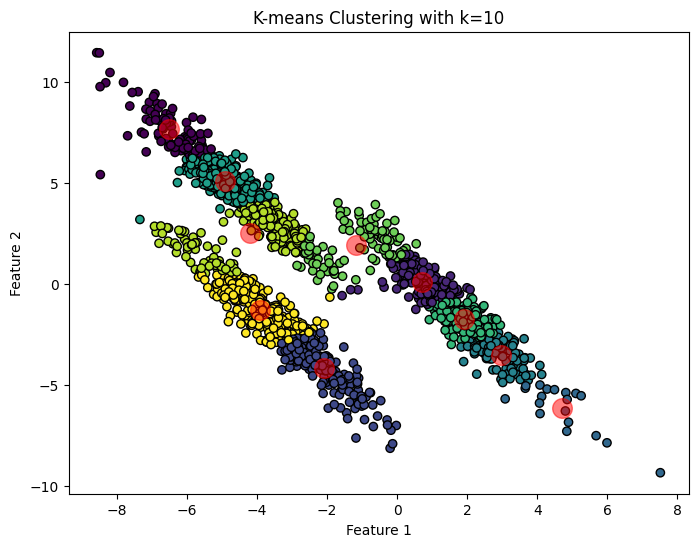

Stop at iter 26


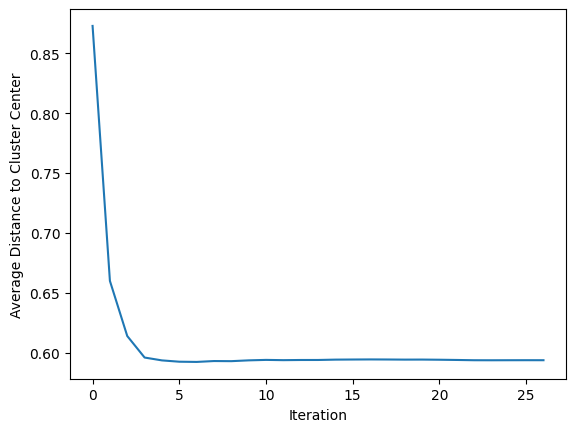

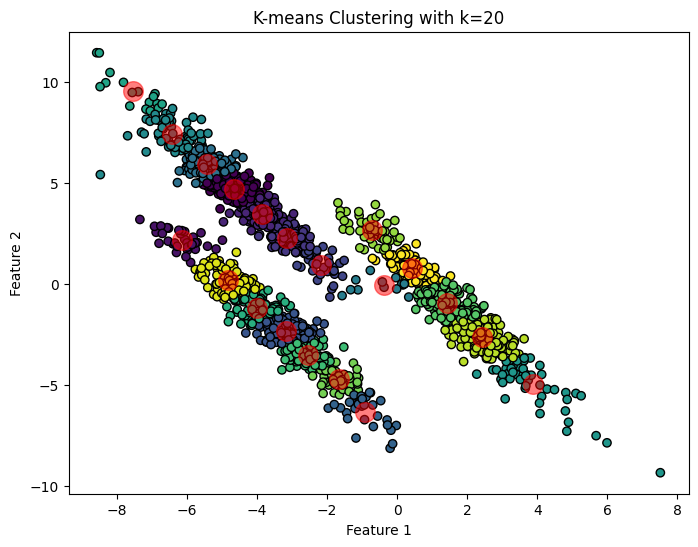

Stop at iter 16


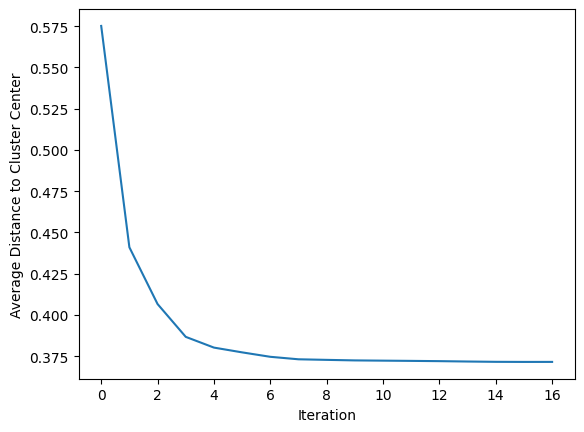

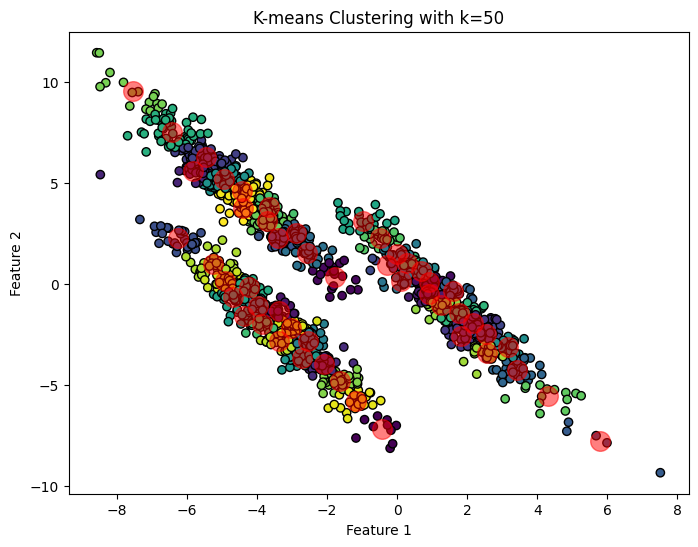

Stop at iter 19


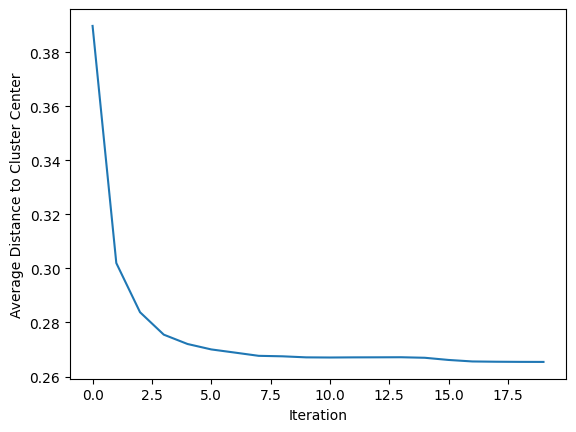

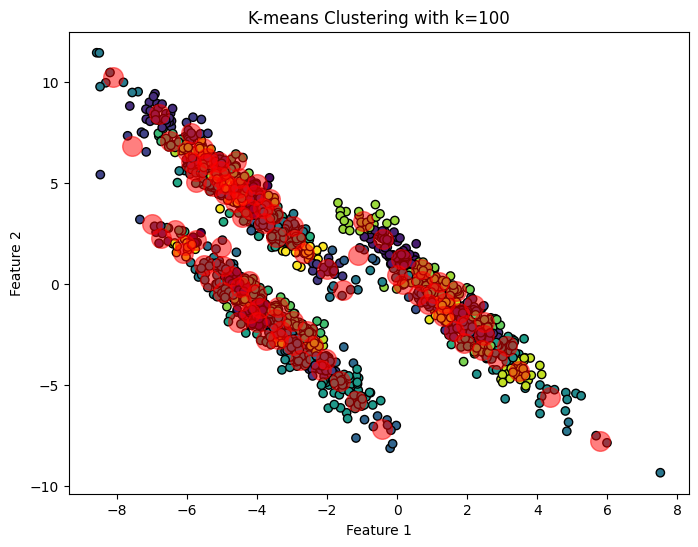

Stop at iter 0


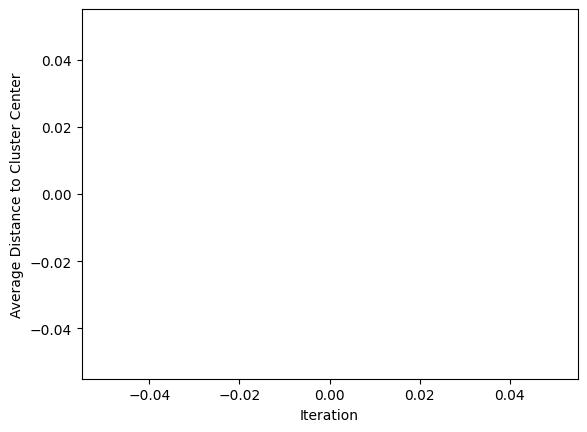

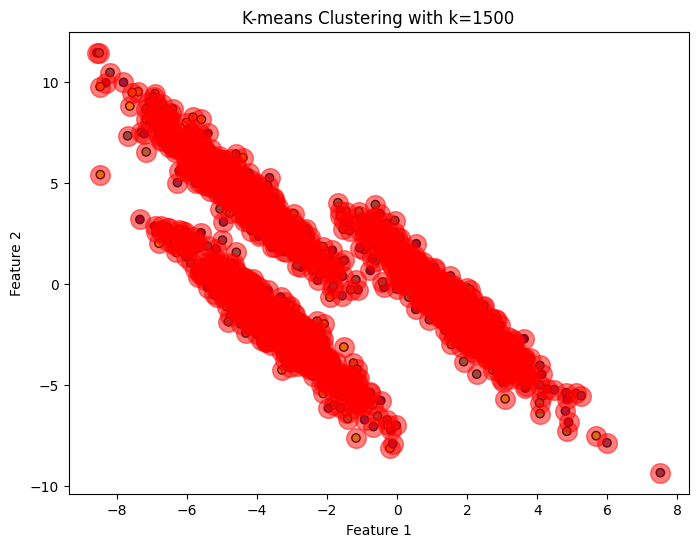

In [ ]:
n_clusters = [1, 2, 3, 4, 5, 10, 20, 50, 100, X.shape[0]]
for nc in n_clusters:
    clusters_kmeans, centroids_kmeans = k_means_clustering(X, nc)

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters_kmeans, cmap='viridis', edgecolors='k')
    plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', s=200, alpha=0.5)
    plt.title("K-means Clustering with k=%d" % nc)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

1. We see that the average distance decreases as we increase n_clusters because each cluster will cover a more localized region as the number of clusters increases. This is taken to the extreme when n_clusters = n_points, where the average distance is 0 because each point is a cluster, so the distance to itself is 0.

Stop at iter 9


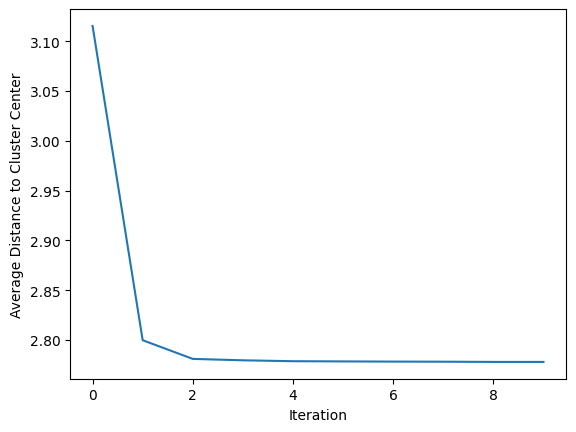

For n_clusters = 2 The average silhouette_score is : 0.4943464883197874
Stop at iter 10


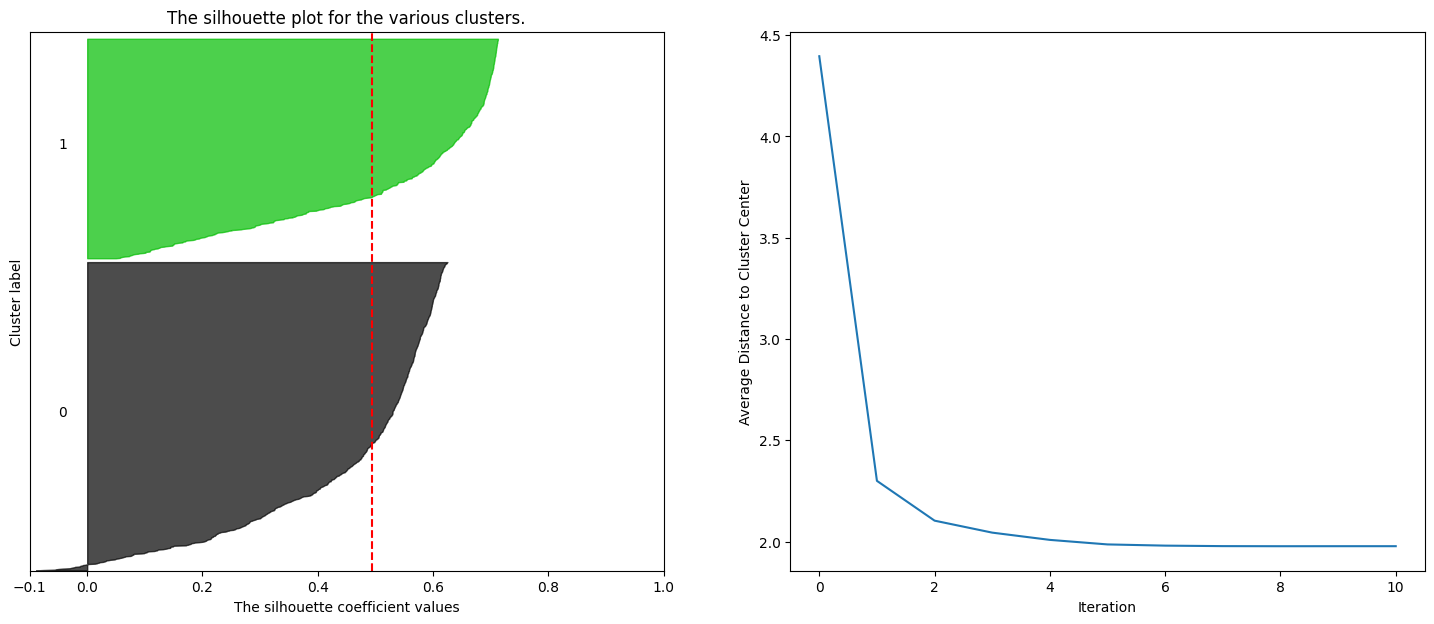

For n_clusters = 3 The average silhouette_score is : 0.5194169615510952
Stop at iter 15


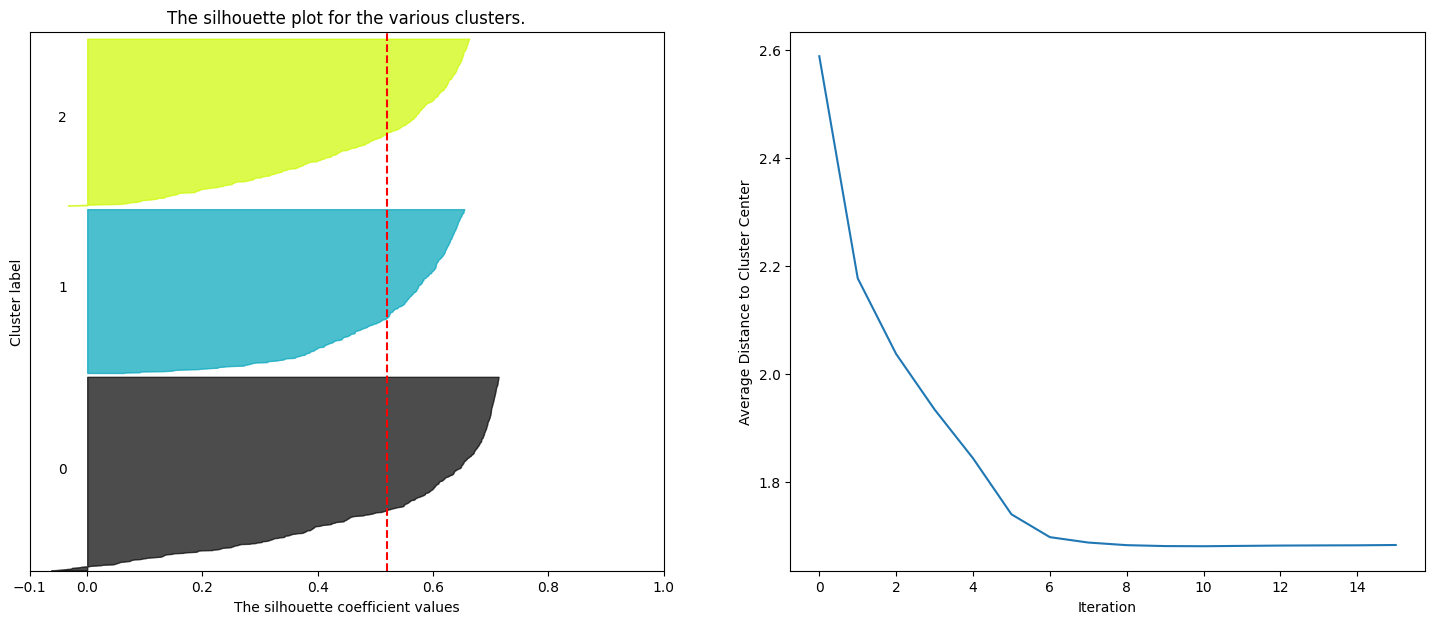

For n_clusters = 4 The average silhouette_score is : 0.47674312041139605
Stop at iter 23


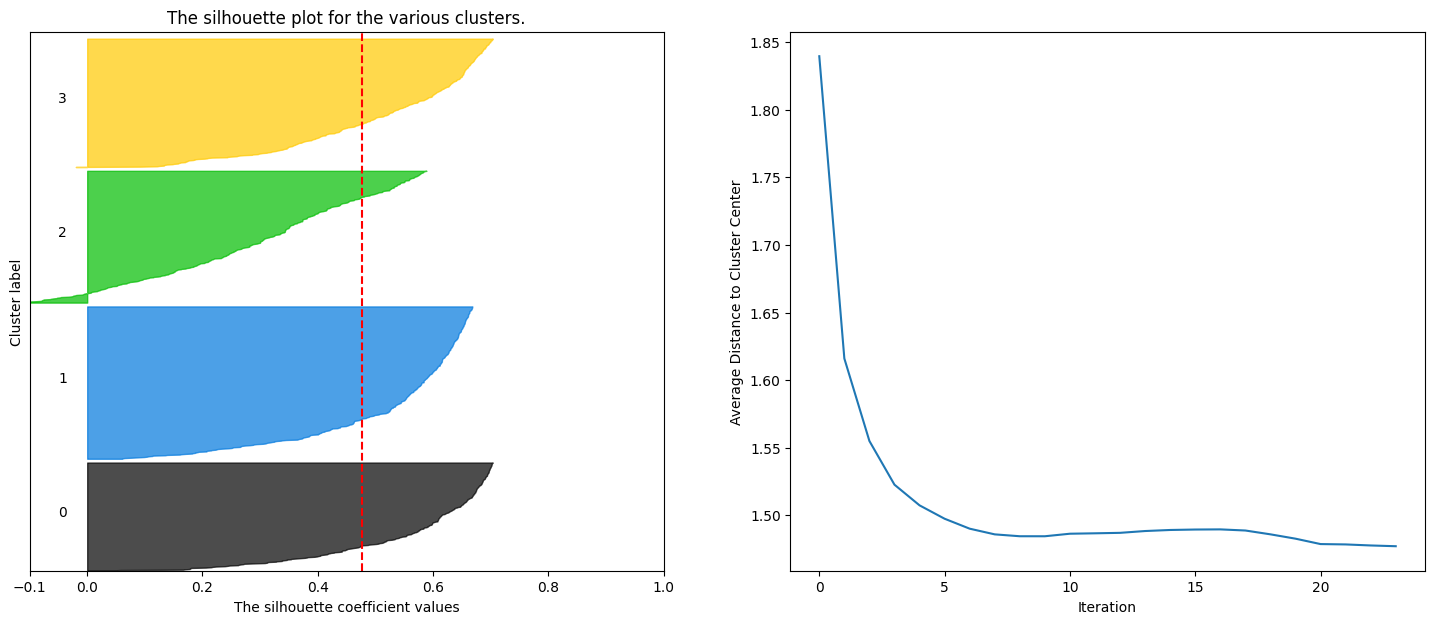

For n_clusters = 5 The average silhouette_score is : 0.47284373642768945
Stop at iter 37


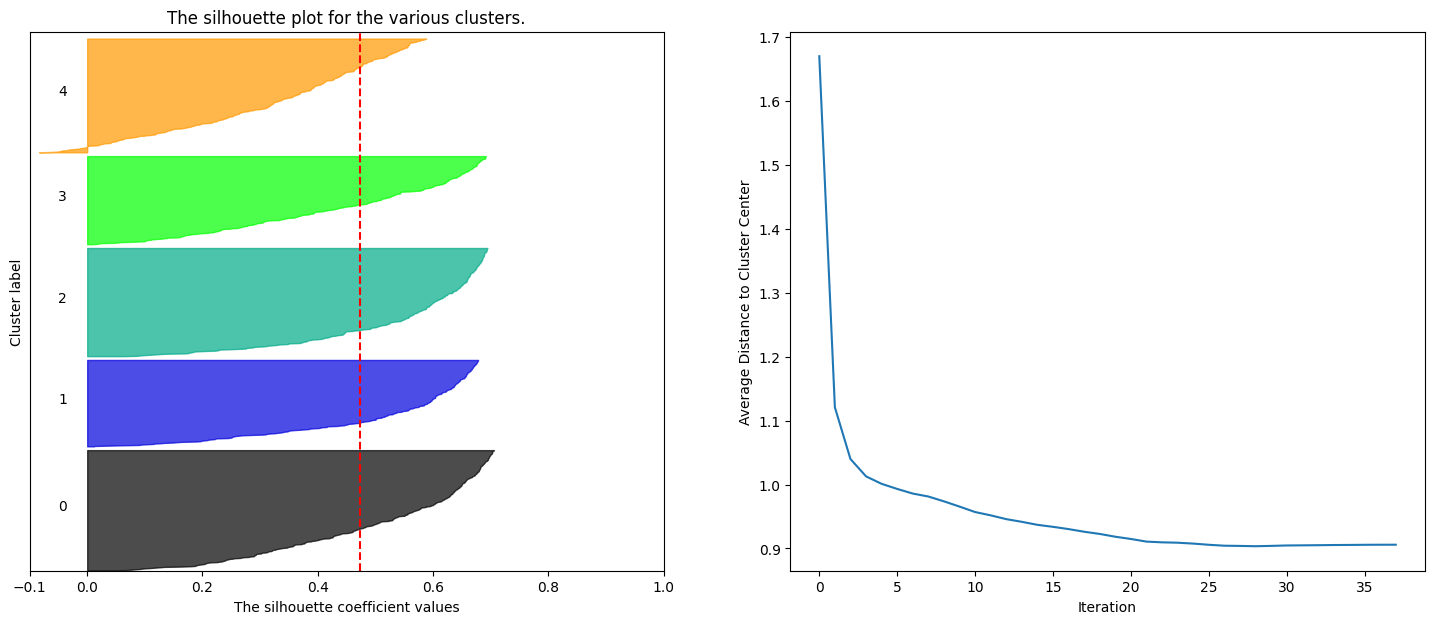

For n_clusters = 10 The average silhouette_score is : 0.47181758487368824
Stop at iter 19


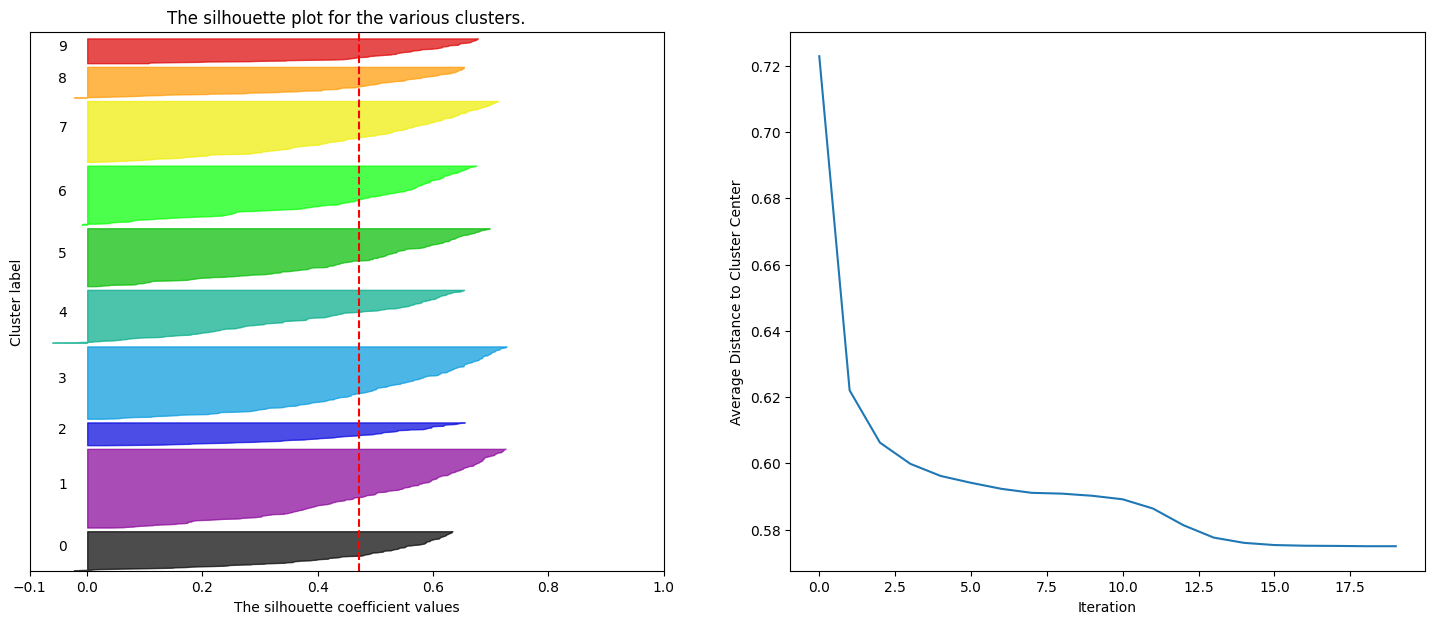

For n_clusters = 20 The average silhouette_score is : 0.42710794675400815
Stop at iter 45


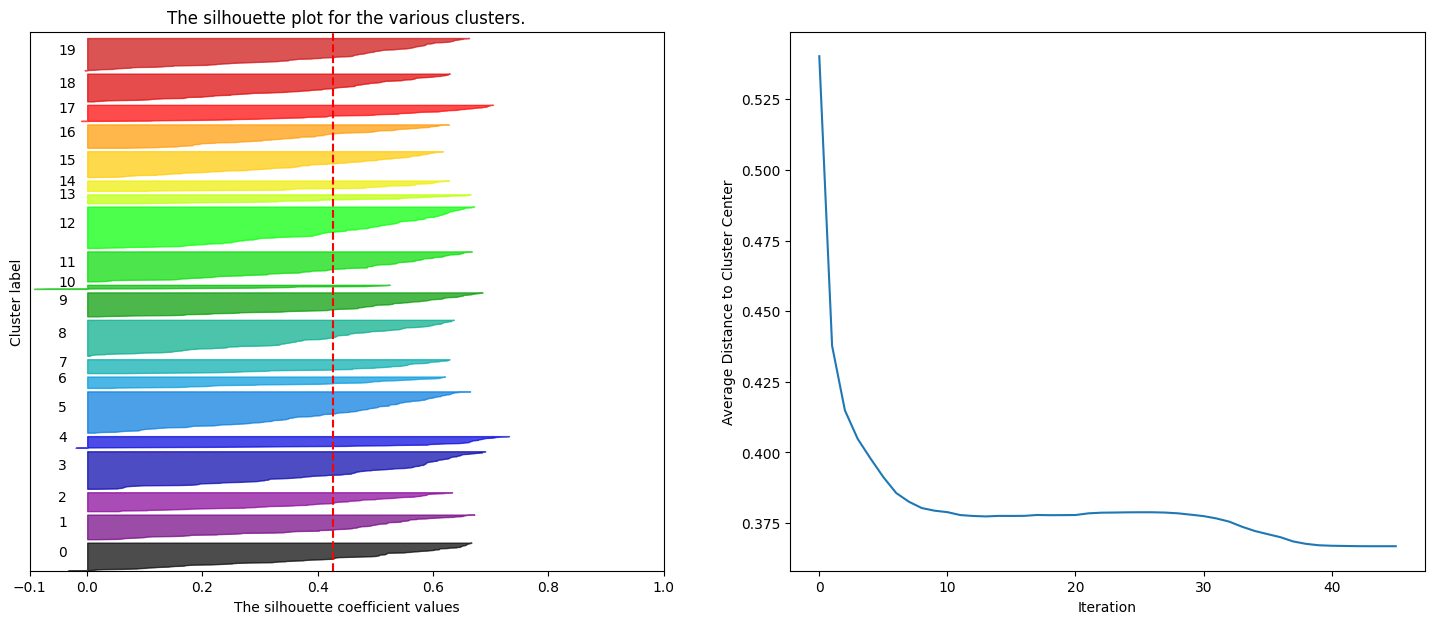

For n_clusters = 50 The average silhouette_score is : 0.3472344506959654
Stop at iter 14


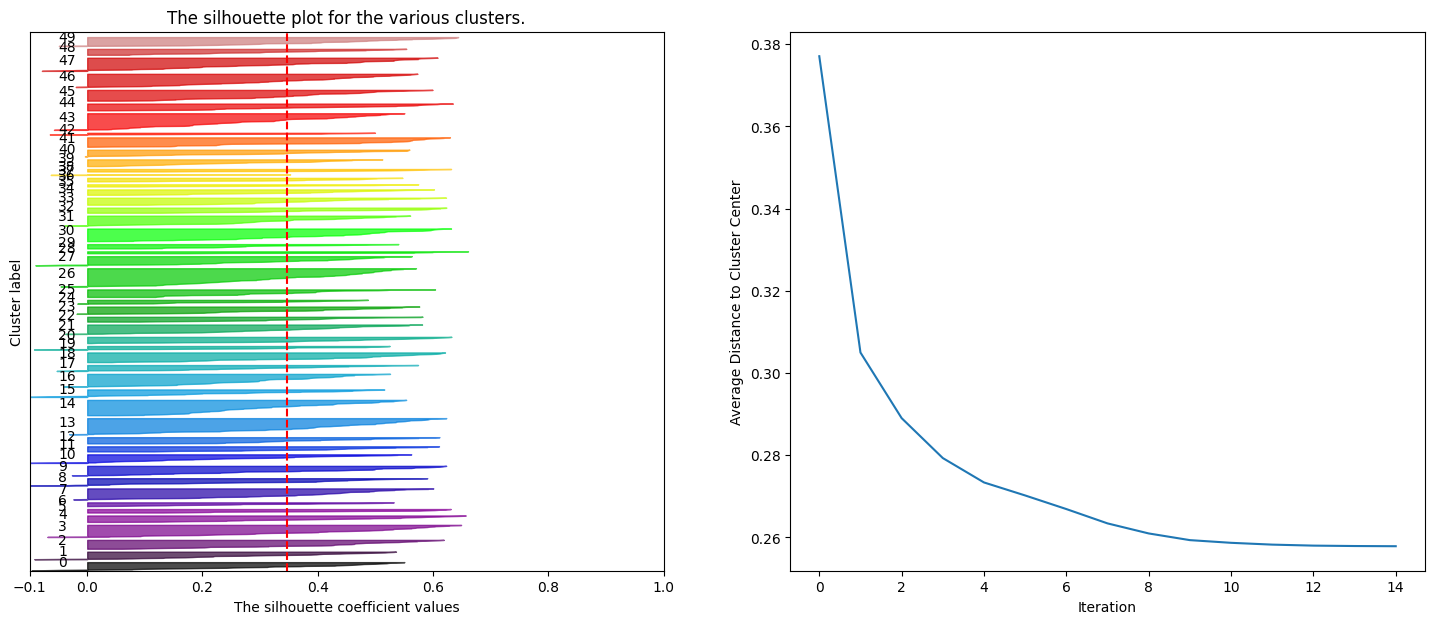

For n_clusters = 100 The average silhouette_score is : 0.3384947672510796


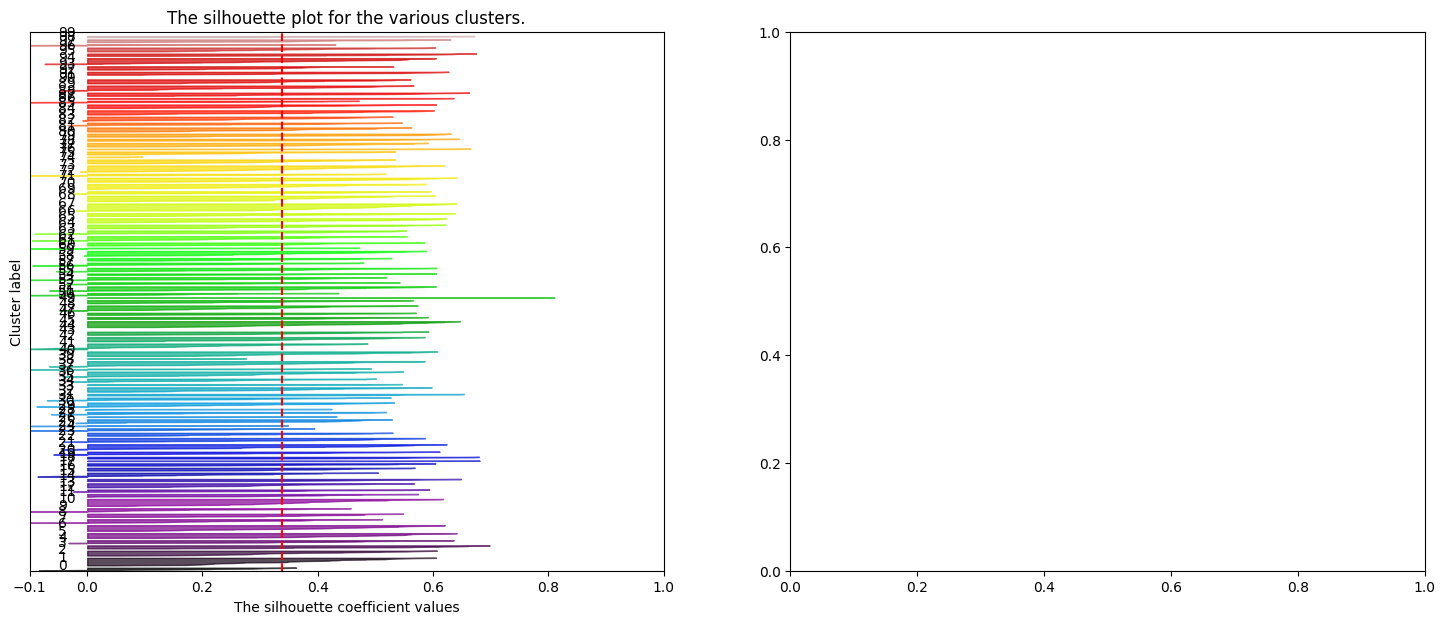

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for nc in n_clusters:
    if(nc > 1 and nc < X.shape[0]-1):
        clusters_kmeans, centroids_kmeans = k_means_clustering(X, nc)
        silhouette_avg = silhouette_score(X, clusters_kmeans)
        print(
            "For n_clusters =",
            nc,
            "The average silhouette_score is :",
            silhouette_avg,
        )
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, clusters_kmeans)
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (nc + 1) * 10])
        y_lower = 1
        for i in range(nc):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[clusters_kmeans == np.int64(i)]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / nc)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

2. Looking at the average silhouette score, we see with 3 clusters that we get the highest score, indicating there is better separation between the clusters. And we see that unlike with 2, 4, and 5 clusters, the cluster sizes are relatively similar with 3 clusters, indicating that we're not grouping 2 clusters together or getting some other, more arbitrary grouping. So, 3 seems to be optimal here.

Stop at iter 15


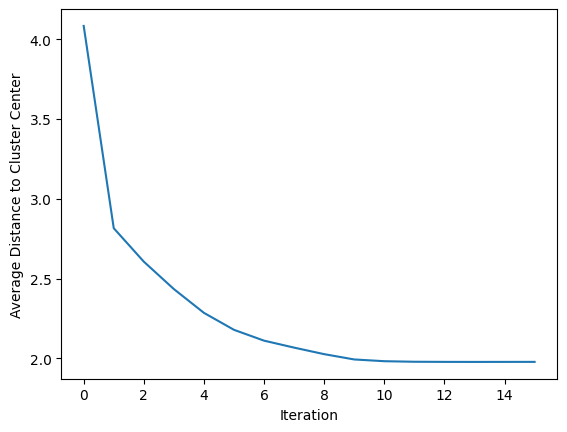

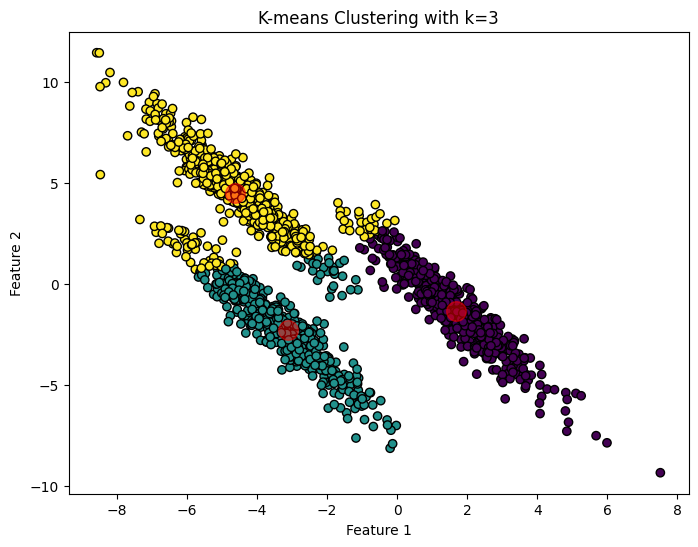

Stop at iter 15


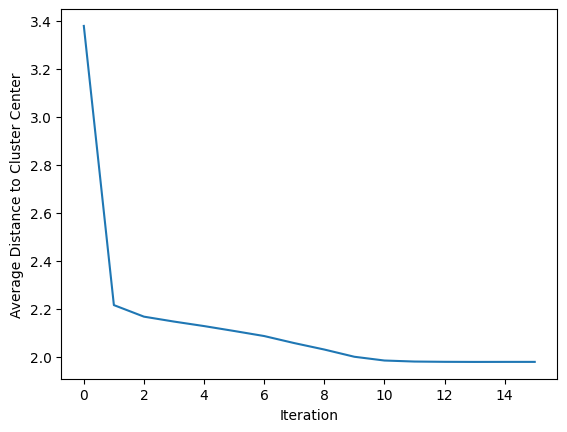

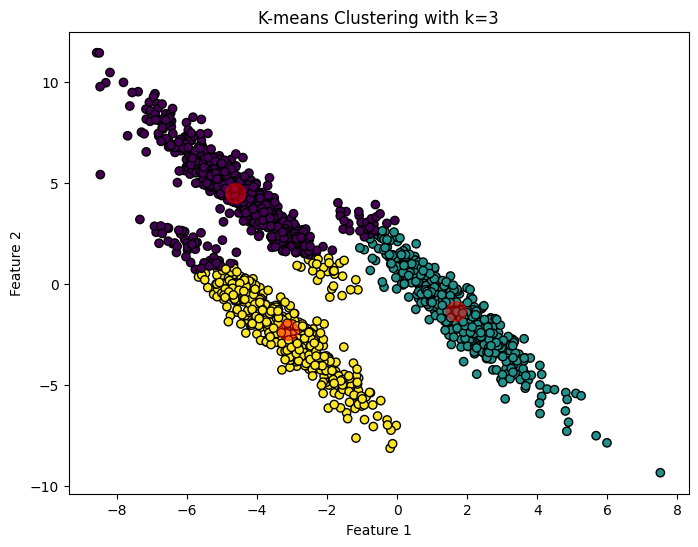

Stop at iter 25


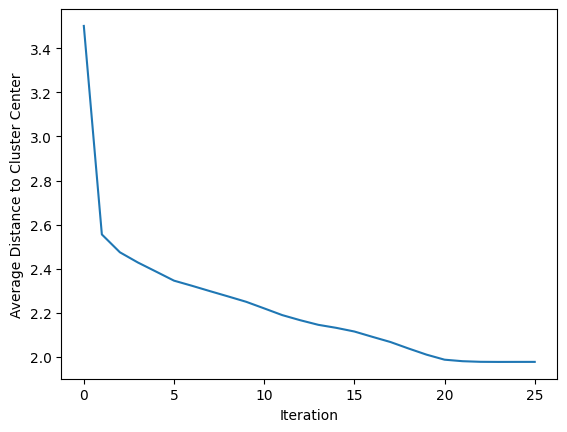

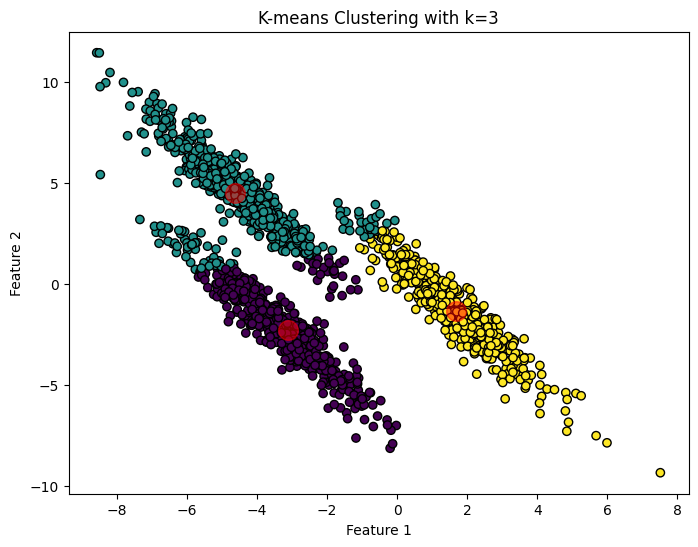

Stop at iter 5


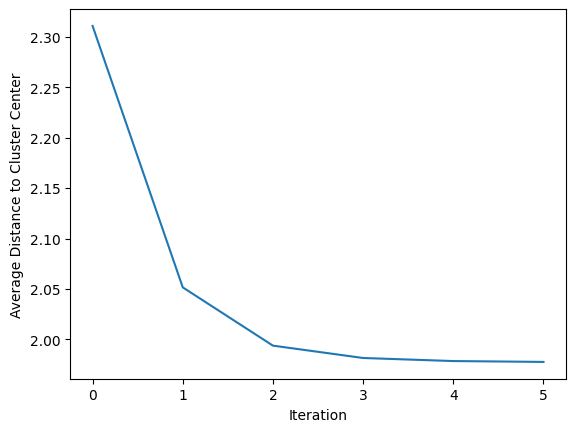

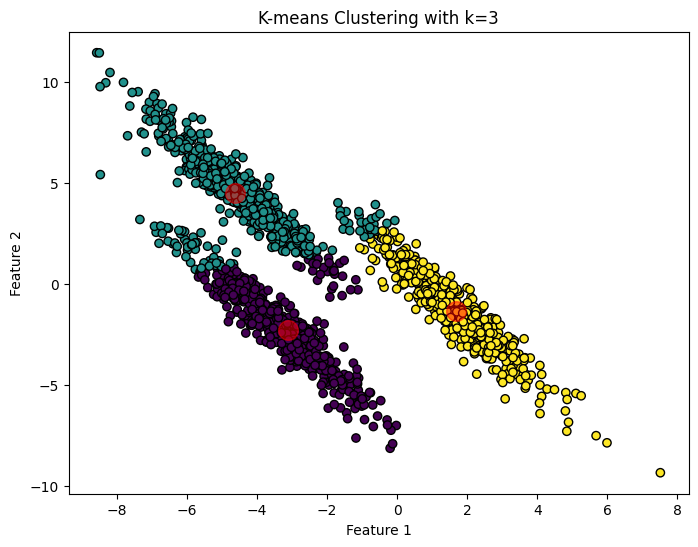

Stop at iter 23


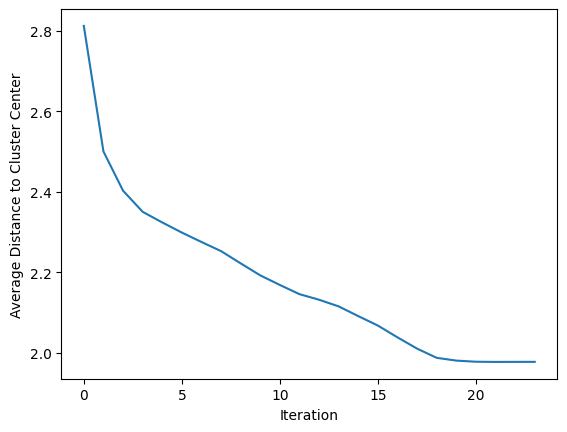

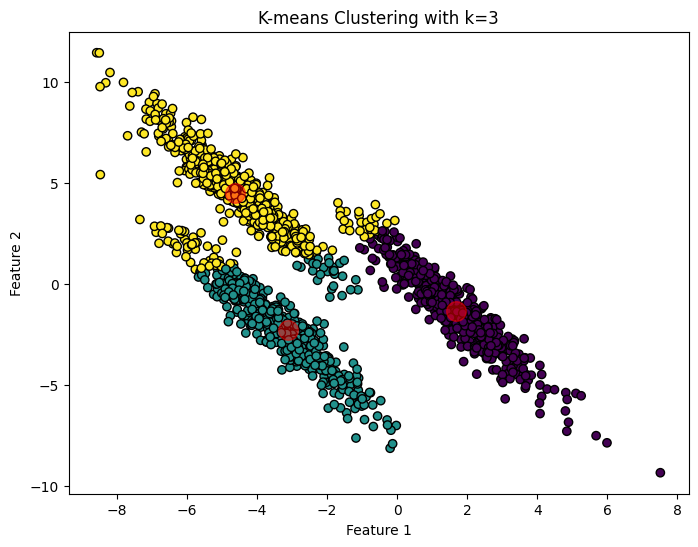

Stop at iter 6


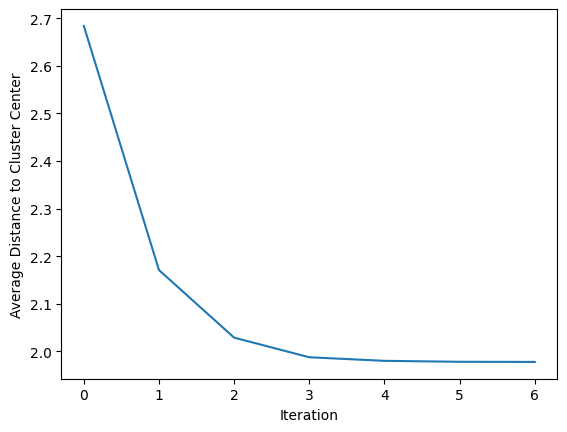

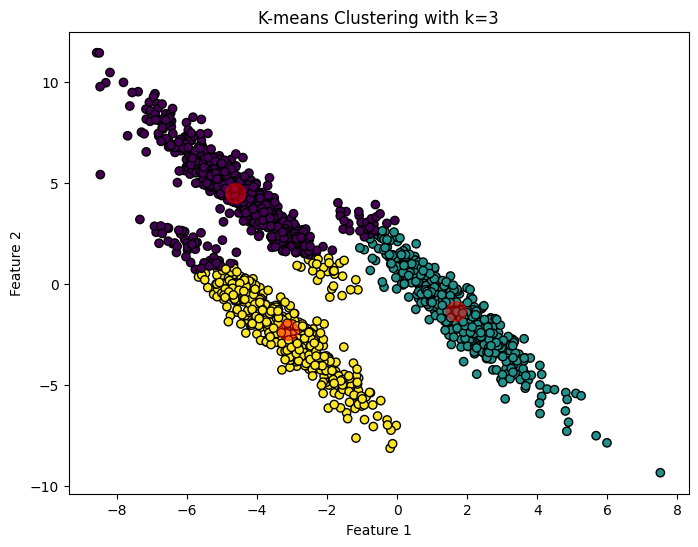

Stop at iter 16


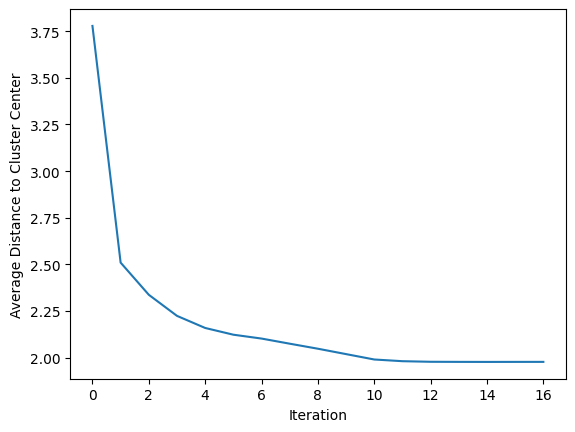

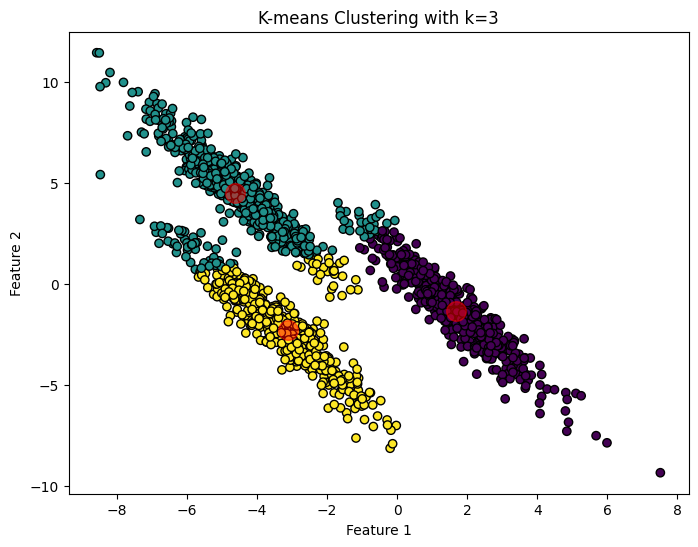

Stop at iter 11


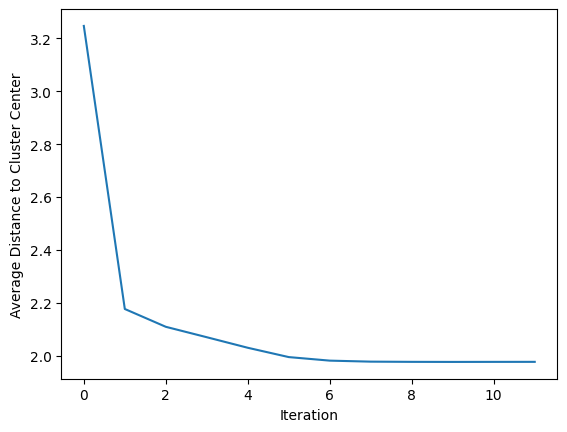

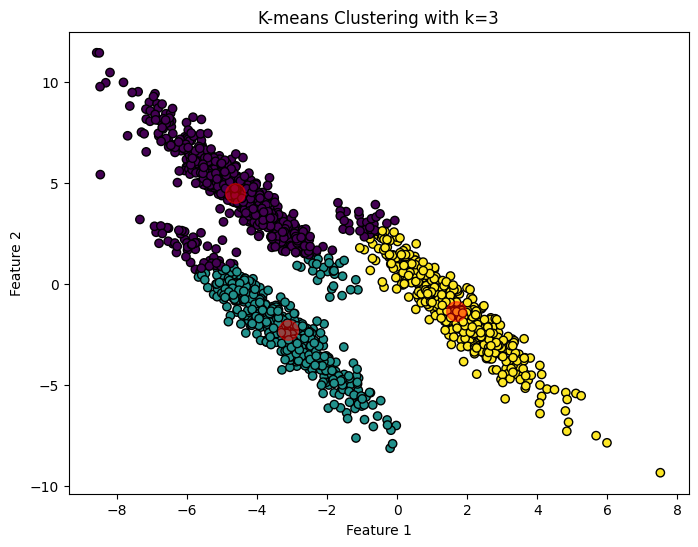

Stop at iter 9


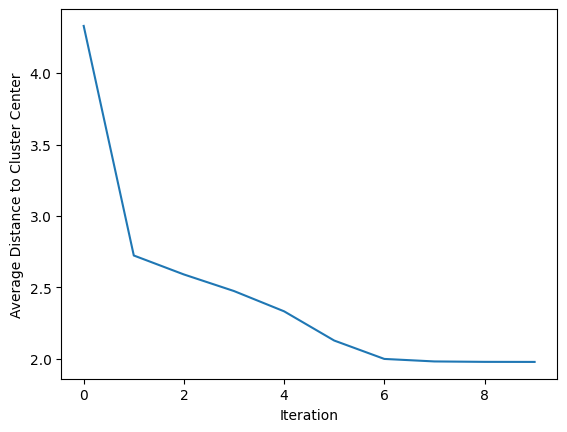

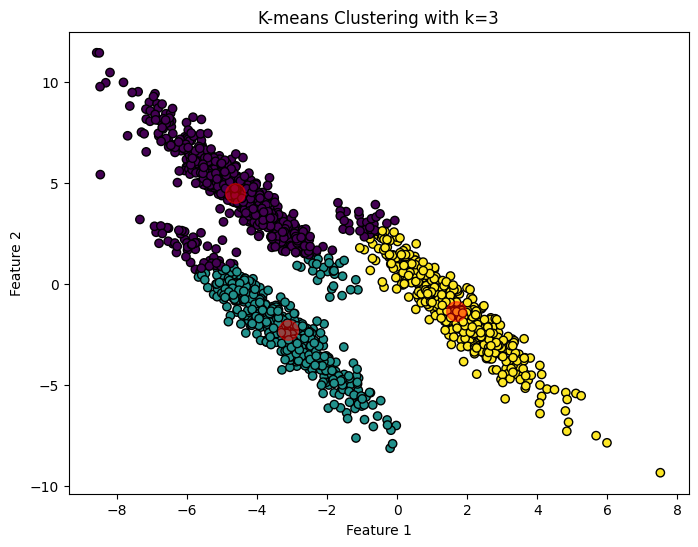

Stop at iter 16


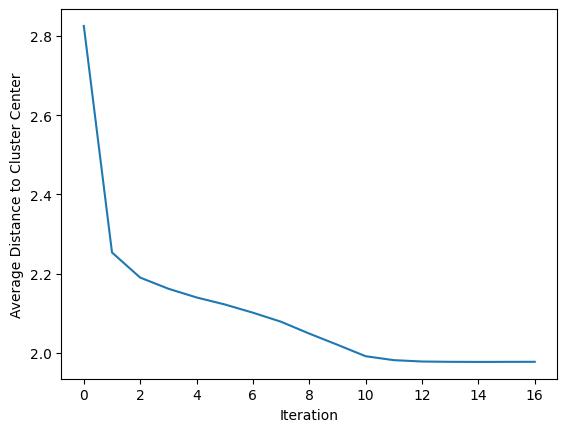

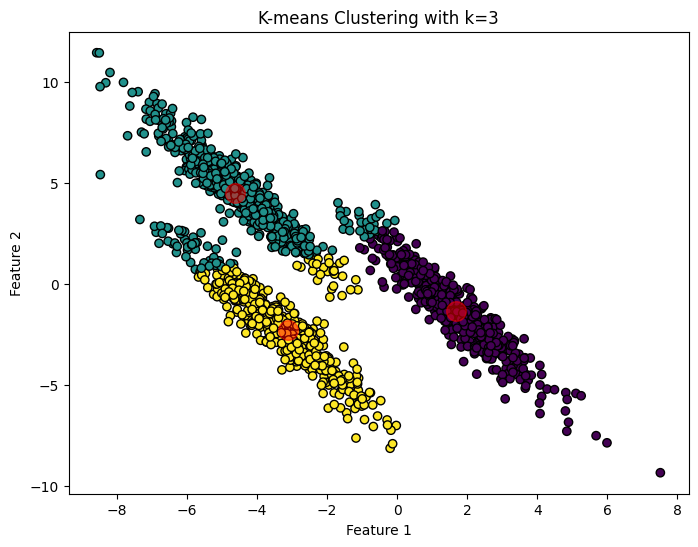

In [ ]:
for i in range(10):
    k = 3
    clusters_kmeans, centroids_kmeans = k_means_clustering(X, k)

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters_kmeans, cmap='viridis', edgecolors='k')
    plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', s=200, alpha=0.5)
    plt.title("K-means Clustering with k=%d" % k)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

### Problem 1.4: Convergence (10 points)

Prove that the K-Means clustering algorithm converges in a finite number of steps.


1. **Objective Function**  
   **Sub-question**: What is the objective function that K-Means minimizes? How does this function change after each iteration?  
   **Hint**: Consider the within-cluster sum of squares (WCSS):
   $$
   J = \sum_{i=1}^k \sum_{x \in C_i} \|x - \mu_i\|^2
   $$
   Explore how this function behaves during each step of the algorithm. How do the assignment and update steps influence the value of $J$?

2. **Bounding the Objective**  
   **Sub-question**: What is the smallest possible value the objective function $J$ can take? What does this imply about the number of iterations?  
   **Hint**: Think about the range of possible values for $J$. How does the fact that the objective is non-negative affect the number of iterations?

3. **Monotonic Decrease in Steps**  
   **Sub-question**: Why does the objective function either decrease or remain constant after each iteration?  
   **Hint**: Analyze both the assignment and centroid update steps. How does each step attempt to minimize the distance between points and centroids?

4. **Finite Configurations**  
   **Sub-question**: Why can the algorithm only run for a finite number of steps?  
   **Hint**: Consider the number of possible assignments of $n$ points to $k$ clusters. Why does the algorithm eventually stabilize after some iterations?

1. The objective function that K-Means minimizes is $J = \sum_{n=1}^N\sum_{k=1}^K r_{nk}\|\mathbf{x}_n-\boldsymbol{\mu}_k\|_2^2$, and after each iteration, the value of the indicator variable $r_{nk}\in\{0,1\}$ changes as each $\mathbf{x}_n$ is assigned to a different cluster $k$ and the center of each cluster ($\boldsymbol{\mu}_k$) changes as we change the cluster assignments of each $\mathbf{x}_n$. The assignment and updates steps should either decrease $J$ or not change it.
2. $J$ can have a minimum value of $0$, since the euclidean distance $\|\mathbf{x}_n-\boldsymbol{\mu}_k\|_2^2 \geq 0$, and therefore a sum of these distances is also $\geq 0$. As we've stated, the assignment and update steps will either decrease $J$ or keep it constant, and since there is a bound on $J$, we know that we cannot infinitely decrease $J$ without also infinitely decreasing the difference between each iteration of $J$, implying $J\to 0$ or $\Delta J \to 0$, where $\Delta J = J_{i+1}-J_i$ for each iteration $i$.
3. Each time we do the assignment step, we are reassigning $\mathbf{x}_n$ to the cluster with minimum distance to $\mathbf{x}_n$, i.e. after each iteration $i$ we assign $\mathbf{x}_n^{(i+1)}$ such that $\|\mathbf{x}_n^{(i+1)}-\boldsymbol{\mu}_k^{(i)}\| \leq \|\mathbf{x}_n^{(i)}-\boldsymbol{\mu}_k^{(i)}\|$, thus if we have pre-assignment $J_i$ and post-assignment $J_{i+1}$, we will have $J_{i+1} \leq J_i$. When we update the clusters, we take the derivative of the objective function with respect to each $\boldsymbol{\mu}_k$ to minimize the value $J$. WLOG, take one cluster $k$, then for each $k$ we get $\frac{\partial}{\partial \boldsymbol{\mu}_k}\sum_{n=1}^N\sum_{k=1}^K r_{nk}\|\mathbf{x}_n-\boldsymbol{\mu}_k\|_2^2 = \sum_{n=1}^N r_{nk}\frac{\partial}{\partial \boldsymbol{\mu}_k}((x_{n1}-\mu_{k1})^2+\dots+(x_{nm}-\mu_{km})^2)= \sum_{n=1}^Nr_{nk}-2(x_{n1}-\mu_{k1})-\dots-2(x_{nm}-\mu_{km})$ $= \sum_{n=1}^N-2r_{nk}\mathbf{x}_n+2r_{nk}\boldsymbol{\mu}_k$. Setting this equal to $0$, we get $\sum_{n=1}^N-2r_{nk}\mathbf{x}_n+2r_{nk}\boldsymbol{\mu}_k = 0 \implies 2\sum_{n=1}^Nr_{nk}\boldsymbol{\mu}_k = 2\sum_{n=1}^Nr_{nk}\mathbf{x}_n \implies \boldsymbol{\mu}_k = \frac{\sum_{n=1}^Nr_{nk}\mathbf{x}_n}{\sum_{n=1}^Nr_{nk}}$. Which is our update rule. And by taking the second derivative test we get $\frac{\partial}{\partial \boldsymbol{\mu}_k}\sum_{n=1}^N-2r_{nk}\mathbf{x}_n+2r_{nk}\boldsymbol{\mu}_k = 2\sum_{n=1}^Nr_{nk} \geq 0$ (only $= 0$ when no points are assigned to cluster $k$). Thus, we know that $\boldsymbol{\mu}_k = \frac{\sum_{n=1}^Nr_{nk}\mathbf{x}_n}{\sum_{n=1}^Nr_{nk}}$ is a local minimum for our objective function $J$, therefore the update step also monotonically decreases $J$. Therefore, the entire algorithm monotonically decreases $J$.
4. Since both $n$ and $k$ are finite, we know there are a finite number of combinations of the $n$ points into $k$ clusters. Each of these combinations will then calculate their respective means as the cluster centers, which will always be the same given the same set of points, meaning that there are a finite number of cluster centers as well. Since the objective function $J$ is monotonically decreasing and bounded from below, we know that it will converge to some value. And since there are a finite number of clusters and cluster centers, we know that we must converge within a finite number of steps.

### Problem 1.5: Convergence with $L_1$ Distance (10 bonus points)

Prove that K-Means still converges in a finite number of steps when using the $L_1$ (Manhattan) distance instead of the $L_2$ (Euclidean) distance.

**Hint**: Reformulate the objective function using the $L_1$ distance:
$$
J_{L1} = \sum_{i=1}^k \sum_{x \in C_i} \|x - \mu_i\|_1
$$
Investigate whether the properties that guarantee convergence under the $L_2$ norm (monotonic decrease, boundedness, and finite configurations) still hold under the $L_1$ norm. Can the same reasoning apply for this different distance metric?

We see that we still have $J_{L1} \geq 0$ with the $L_1$ distance, and thus it is still bounded. It is also still has a finite number of combinations for the clusters. Thus, we just need to show that $J_{L1}$ monotonically decreases. In the assignment step, we are still selecting $\mathbf{x}_n$ to be in the nearest cluster $k$, and thus we still have that $\|\mathbf{x}_n^{(i+1)}-\boldsymbol{\mu}_k^{(i)}\| \leq \|\mathbf{x}_n^{(i)}-\boldsymbol{\mu}_k^{i}\|$, and therefore $J_{i+1} \leq J_i$. So, all we have left to show is that the update step also monotonically decreases $J$. Let us again take the derivative of $J_{L1}$ with respect to $\boldsymbol{\mu}_k$, i.e. $\frac{\partial}{\partial \boldsymbol{\mu}_k}\sum_{n=1}^N\sum_{k=1}^Kr_{nk}\|\mathbf{x}_n-\boldsymbol{\mu}_k\|_1 = \sum_{n=1}^N r_{nk}\frac{\partial}{\partial \boldsymbol{\mu}_k}(|x_{n1}-\mu_{k1}|+\dots+|x_{nm}-\mu_{km}|) = \sum_{n=1}^N r_{nk}(\frac{\mu_{k1}-x_{n1}}{|x_{n1}-\mu_{k1}|}+\dots+\frac{\mu_{km}-x_{nm}}{|x_{nm}-\mu_{km}|}) = \sum_{n=1}^N r_{nk} \frac{\boldsymbol{\mu}_k-\mathbf{x}_n}{|\mathbf{x}_n-\boldsymbol{\mu}_k|}$. Then setting this equal to $0$, we get $\sum_{n=1}^N r_{nk} \frac{\boldsymbol{\mu}_k-\mathbf{x}_n}{|\mathbf{x}_n-\boldsymbol{\mu}_k|} = 0$. We ignore $r_{nk}$ since it just controls which $\mathbf{x}_n$ belong to the cluster $k$ and we look at $\frac{\boldsymbol{\mu}_k-\mathbf{x}_n}{|\mathbf{x}_n-\boldsymbol{\mu}_k|}$. This is essentially just the sign of $\boldsymbol{\mu}_k-\mathbf{x}_n$, i.e. $\frac{\boldsymbol{\mu}_k-\mathbf{x}_n}{|\mathbf{x}_n-\boldsymbol{\mu}_k|} \in \{1,-1\}$ (assuming $\mathbf{x}_n-\boldsymbol{\mu}_k \neq 0$). This sum is $0$ when we have an equal number of elements $\mathbf{x}_n > \boldsymbol{\mu}_k$ and $\mathbf{x}_n < \boldsymbol{\mu}_k$. Thus, we choose $\boldsymbol{\mu}_k$ to be the median of the $\mathbf{x}_n$ in cluster $k$. This then guarantees that $J_{L1}$ monotonically decreases in the update step as well. Thus, we have shown that $J_{L1}$ is a monotonically decreasing function bounded from the bottom and therefore it converges. Like we said above, given any cluster $k$, the median will always stay the same and so there are a finite number of cluster combinations with a finite number of cluster centers, and therefore $J_{L1}$ will converge in finite number of steps.

## Part 2: The Transformer Model (80 points)

In this assignment, you will build a Transformer model from scratch using PyTorch. This exercise aims to deepen your understanding of the Transformer architecture, as introduced by Vaswani et al. in the landmark paper [*Attention is All You Need*](https://arxiv.org/abs/1706.03762). By implementing the various components of the Transformer, you will gain hands-on experience with key concepts such as self-attention mechanisms, positional encoding, and the overall architecture of the Transformer model.

### Key Components of the Transformer

<center></center>

1. **Encoder and Decoder**: The Transformer model consists of an encoder to process the input text and a decoder to generate the output text. Both the encoder and decoder are composed of multiple layers that contain self-attention and feed-forward neural network components.
2. **Multi-Head Attention**: This component allows the model to jointly attend to information from different representation subspaces at different positions. Implementing multi-head attention is a critical part of this assignment.
3. **Positional Encoding**: Since the model contains no recurrence or convolution, positional encodings are added to give the model some information about the relative or absolute position of the tokens in the sequence.
4. **Feed-Forward Networks**: Each layer of the encoder and decoder contains a feed-forward neural network which applies two linear transformations and a ReLU activation in between.

In the following sections, you will implement these components step by step.

### GPU Support

 You can use [Google Colab](https://colab.research.google.com/) or a GPU server for this exercise. If you are using Colab, you can manually switch to a CPU device on Colab by clicking `Runtime -> Change runtime type` and selecting `GPU` under `Hardware Accelerator`.

In [2]:
import torch

USE_GPU = True

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
elif USE_GPU and torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

In [3]:
print('Using device:', device)

Using device: cuda


### Problem 2.1: Multi-Head Attention (20 points)

The attention mechanism computes the dot product between the query and key vectors, scaled by the square root of the dimension of the key vectors. The attention weights are then used to compute a weighted sum of the value vectors.
Please implement the `scaled_dot_product_attention` function at first, which will used as a building block for the multi-head attention mechanism. This function computes the attention weights and the weighted sum of the value vectors, given the projected query, key, and value vectors.

In [4]:
def scaled_dot_product_attention(query, key, value, mask=None):
    """
    Compute the scaled dot product attention.

    Parameters:
    - query (torch.Tensor): Queries tensor with shape (batch_size, num_heads, seq_len_q, depth).
    - key (torch.Tensor): Keys tensor with shape (batch_size, num_heads, seq_len_k, depth).
    - value (torch.Tensor): Values tensor with shape (batch_size, num_heads, seq_len_v, depth).
    - mask (torch.Tensor, optional): Mask tensor to filter out certain positions before
      applying softmax. The mask's shape is broadcastable to (batch_size, num_heads, seq_len_q, seq_len_k).
      The mask will contain either 0 values to indicate that the corresponding token in the input sequence
      should be considered in the computations or a 1 to indicate otherwise.

    Returns:
    - torch.Tensor: The output after applying attention to the value vector. Shape is (batch_size, num_heads, seq_len_q, depth).
    - torch.Tensor: The attention weights. Shape is (batch_size, num_heads, seq_len_q, seq_len_k).
    """

    # TODO: Compute the matrix multiplication between the query and key tensors
    # Hint: The resulting tensor has shape (batch_size, num_heads, seq_len_q, seq_len_k)
    matmul_qk = torch.matmul(query, key.transpose(-2, -1))

    # TODO: Scale the attention weights by the dimension of the key
    scaled_qk = torch.div(matmul_qk, np.sqrt(key.shape[-1]))

    # TODO: Apply the mask to the scaled tensor
    # Hint: You can use the `masked_fill` method of the tensor and mask out
    #   certain positions to a large negative number (e.g., -1e9)
    #   such that the attention weights will be zero after applying softmax
    if mask is not None:
        scaled_qk = scaled_qk.masked_fill(mask == 1, -1e9)

    # TODO: Apply the softmax function to obtain the attention weights
    attention_weights = scaled_qk.softmax(dim=-1)

    # TODO: Apply the attention weights to the value tensor
    output = torch.matmul(attention_weights, value)

    return output, attention_weights

You can verify your implementation by running the test cases provided.

In [5]:
batch_size = 4
num_heads = 8
seq_len_q = 10
seq_len_k = 10
seq_len_v = 10
depth = 128

query = torch.rand(batch_size, num_heads, seq_len_q, depth)
key = torch.rand(batch_size, num_heads, seq_len_k, depth)
value = torch.rand(batch_size, num_heads, seq_len_v, depth)

output, attention_weights = scaled_dot_product_attention(query, key, value)

assert output.shape == (batch_size, num_heads, seq_len_q, depth)
assert attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)

from torch.nn.functional import scaled_dot_product_attention as torch_scaled_dot_product_attention
from torch.testing import assert_close

torch_output = torch_scaled_dot_product_attention(query, key, value)
assert_close(output, torch_output, rtol=1e-6, atol=1e-6)

In Transformers, there are multiple "attention heads", each of which captures a different aspect of the input.
At first, the query and key vectors are passed through a linear layer to project them to a higher-dimensional space. Then, the scaled dot-product attention is applied to each of these projected versions of the query and key vectors. The output of the linear layer is then reshaped to split the attention heads. The attention weights are computed for each head, and the weighted sum is then concatenated and passed through another linear layer to produce the final output.
Please implement the `MultiHeadAttention` class, which contains the logic for the multi-head attention mechanism.

In [6]:
class MultiHeadAttention(torch.nn.Module):
    """
    Multi-Head Attention module takes in queries, keys, and values, and
    performs scaled dot-product attention on them. This implementation also
    supports masking irrelevant positions.

    Parameters:
    - d_model (int): The dimension of the input embedding vectors.
    - num_heads (int): The number of attention heads. d_model must be divisible by num_heads.

    The architecture splits the input embedding vector into multiple heads because
    it allows the model to jointly attend to information from different representation
    subspaces at different positions. After the attention is applied, the heads are
    concatenated and linearly transformed back to the original d_model dimension.
    """

    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        assert d_model % self.num_heads == 0
        self.depth = d_model // self.num_heads

        self.wq = torch.nn.Linear(d_model, d_model)
        self.wk = torch.nn.Linear(d_model, d_model)
        self.wv = torch.nn.Linear(d_model, d_model)
        self.dense = torch.nn.Linear(d_model, d_model)

    def split_heads(self, x, batch_size):
        """
        Split the last dimension of the input into (num_heads, depth).
        Transpose the result such that the shape becomes (batch_size, num_heads, seq_len, depth)
        to prepare for parallel computation of attention heads.

        Parameters:
        - x (torch.Tensor): The input tensor.
        - batch_size (int): Batch size for reshaping.

        Returns:
        - torch.Tensor: The reshaped tensor with dimensions (batch_size, num_heads, seq_len, depth).
        """

        x = x.view(batch_size, -1, self.num_heads, self.depth).transpose(1, 2)
        return x

    def forward(self, q, k, v, mask=None):
        """
        The forward pass for the Multi-Head Attention layer.

        Parameters:
        - q, k, v (torch.Tensor): Queries, keys, and values respectively. These tensors have shapes
          (batch_size, seq_len, d_model).
        - mask (torch.Tensor, optional): The mask tensor can be used to mask out (ignore) certain positions
          during the attention mechanism. This is useful for masking padded positions in the input
          sequences or to enforce causality in decoder self-attention. The shape of the mask tensor
          should be (batch_size, 1, 1, seq_len) for padding mask, or (batch_size, 1, seq_len, seq_len)
          for look-ahead mask.

        Returns:
        - torch.Tensor: The output after applying multi-head attention. Shape is (batch_size, seq_len, d_model).
        - torch.Tensor: The attention weights. Shape is (batch_size, num_heads, seq_len, seq_len).
        """

        batch_size = q.size(0)
        q = self.split_heads(self.wq(q), batch_size)
        k = self.split_heads(self.wk(k), batch_size)
        v = self.split_heads(self.wv(v), batch_size)

        output, attention_weights = scaled_dot_product_attention(q, k, v, mask)

        # TODO: Concatenate multiple attention heads
        # Hint: The shape of the output should be (batch_size, seq_len, d_model)
        output = output.transpose(1, 2)
        # return output.reshape(batch_size, -1, output.shape[-2]*output.shape[-1]), attention_weights
        return output.reshape(batch_size, -1, self.d_model), attention_weights

### Problem 2.2: Positional Encoding (20 points)

Positional Encoding is a method used to inject some information about the relative or absolute position of the tokens in the sequence. The positional encodings have the same dimension as the embeddings so that the two can be summed. There are many choices of positional encodings, learned and fixed. In this assignment, you will implement the fixed positional encoding as described in the following equations:

$$
\begin{align}
    PE_{(pos, 2i)} & = \sin(pos/10000^{2i/d_{model}}), \\
    PE_{(pos, 2i+1)} & = \cos(pos/10000^{2i/d_{model}}),
\end{align}
$$
where $pos$ is the word position and $i$ is the embedding dimension.

In [7]:
class PositionalEncoding(torch.nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)

        # TODO: Use the formula given in the original paper to compute the positional encodings
        # Hint: Remember to add one more dimension to the encoding tensor so that it can be broadcasted
        #   to (batch_size, max_len, d_model) when added to the input tensor
        two_i = torch.arange(0, d_model, 2)
        argument = torch.divide(position, torch.pow(10000, two_i/d_model))
        pe[:, 0::2] = torch.sin(argument)
        pe[:, 1::2] = torch.cos(argument[:, :d_model // 2])
        self.pe = pe.unsqueeze(0).to(device)

    def forward(self, x):
        # TODO: Apply the positional encoding to the input tensor
        return x + self.pe[:, :x.size(1)]


### Problem 2.3: Encoder and Decoder (20 points)

This section would involve more detailed implementation, including the sub-layer connections, normalization, and how they are combined to form the complete encoder and decoder architecture. Specifically, you will implement the following components:
- `EncoderLayer`, which contains a multi-head attention layer and a feed-forward neural network, each followed by a residual connection and layer normalization.
- `DecoderLayer`, which contains three sub-layers: masked multi-head attention, multi-head attention, and a feed-forward neural network, each followed by a residual connection and layer normalization.

In [8]:
# had to add torch because nn isn't defined
def pointwise_feedforward_network(d_model, dff):
    return torch.nn.Sequential(
        torch.nn.Linear(d_model, dff),
        torch.nn.ReLU(),
        torch.nn.Linear(dff, d_model)
    )

In [9]:
class EncoderLayer(torch.nn.Module):
    def __init__(self, d_model, num_heads, dff, dropout_rate=0.1):
        """
        Initialize an EncoderLayer.

        Parameters:
        - d_model (int): The dimensionality of the model.
        - num_heads (int): The number of attention heads.
        - dff (int): The dimensionality of the feed-forward network model.
        - dropout_rate (float): The dropout rate.
        """
        super(EncoderLayer, self).__init__()
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = pointwise_feedforward_network(d_model, dff)

        self.layernorm1 = torch.nn.LayerNorm(d_model)
        self.layernorm2 = torch.nn.LayerNorm(d_model)

        self.dropout1 = torch.nn.Dropout(dropout_rate)
        self.dropout2 = torch.nn.Dropout(dropout_rate)

    def forward(self, x, mask):
        """
        The forward pass for the EncoderLayer.

        Parameters:
        - x (Tensor): Input tensor to the encoder layer.
        - mask (Tensor, optional): The mask for padding tokens to ignore during self-attention.

        Returns:
        - Tensor: The output of the encoder layer.
        """
        # TODO: Step 1: Apply multi-head attention (with padding mask) and add & norm
        mha, attn_weights = self.mha.forward(x, x, x, mask)
        mha_add = self.dropout1(mha) + x
        mha_add_ln = self.layernorm1(mha_add)

        # TODO: Step 2: Apply the feed-forward network and add & norm
        ffn = self.ffn(mha_add_ln)
        ffn_add = self.dropout2(ffn) + mha_add_ln
        return self.layernorm2(ffn_add)


In [10]:
class DecoderLayer(torch.nn.Module):
    def __init__(self, d_model, num_heads, dff, dropout_rate=0.1):
        """
        Initialize a DecoderLayer.

        Parameters:
        - d_model (int): The dimensionality of the model, i.e., the size of the input and output embeddings.
        - num_heads (int): The number of attention heads.
        - dff (int): The dimensionality of the feed-forward network model.
        - dropout_rate (float): The dropout rate.
        """
        super(DecoderLayer, self).__init__()
        self.mha1 = MultiHeadAttention(d_model, num_heads)  # Self-attention
        self.mha2 = MultiHeadAttention(d_model, num_heads)  # Cross-attention

        self.ffn = pointwise_feedforward_network(d_model, dff)

        self.layernorm1 = torch.nn.LayerNorm(d_model)
        self.layernorm2 = torch.nn.LayerNorm(d_model)
        self.layernorm3 = torch.nn.LayerNorm(d_model)

        self.dropout1 = torch.nn.Dropout(dropout_rate)
        self.dropout2 = torch.nn.Dropout(dropout_rate)
        self.dropout3 = torch.nn.Dropout(dropout_rate)

    def forward(self, x, enc_output, look_ahead_mask=None, padding_mask=None):
        """
        The forward pass for the DecoderLayer.

        Parameters:
        - x (Tensor): Input tensor for decoder layer.
        - enc_output (Tensor): Output from the encoder (serves as Key and Value for cross attention).
        - look_ahead_mask (Tensor, optional): The mask for future tokens in a sequence within the self-attention mechanism.
        - padding_mask (Tensor, optional): The mask for padding tokens within the encoder output.
        """
        # TODO: Step 1: Self attention with look ahead mask and padding mask
        # mha1, attn_weights1 = self.mha1(x, x, x, torch.maximum(look_ahead_mask, padding_mask))
        mha1, attn_weights1 = self.mha1(x, x, x, look_ahead_mask)
        mha1_add = self.dropout1(mha1) + x
        mha1_add_ln = self.layernorm1(mha1_add)

        # TODO: Step 2: Cross attention where query comes from previous layer, and key, value come from encoder output
        mha2, attn_weights2 = self.mha2(mha1_add_ln, enc_output, enc_output, padding_mask)
        mha2_add = self.dropout2(mha2) + mha1_add_ln
        mha2_add_ln = self.layernorm2(mha2_add)

        # TODO: Step 3: Apply the feed forward network
        ffn = self.ffn(mha2_add_ln)
        ffn_add = self.dropout3(ffn) + mha2_add_ln
        return self.layernorm3(ffn_add), attn_weights1, attn_weights2

In [11]:
import math # add this line otherwise get error
class Encoder(torch.nn.Module):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, max_position_encoding, dropout_rate):
        super(Encoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = torch.nn.Embedding(input_vocab_size, d_model)
        self.pos_encoding = PositionalEncoding(d_model, max_position_encoding)

        self.enc_layers = torch.nn.ModuleList([EncoderLayer(d_model, num_heads, dff, dropout_rate) for _ in range(num_layers)])

        self.dropout = torch.nn.Dropout(dropout_rate)

    def forward(self, x, mask):
        # Adding embedding and position encoding
        x = self.embedding(x) * math.sqrt(self.d_model)
        x = self.pos_encoding(x)

        x = self.dropout(x)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, mask)

        return x  # (batch_size, input_seq_len, d_model)

In [12]:
class Decoder(torch.nn.Module):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, max_position_encoding, dropout_rate):
        super(Decoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = torch.nn.Embedding(target_vocab_size, d_model)
        self.pos_encoding = PositionalEncoding(d_model, max_position_encoding)

        self.dec_layers = torch.nn.ModuleList([DecoderLayer(d_model, num_heads, dff, dropout_rate) for _ in range(num_layers)])
        self.dropout = torch.nn.Dropout(dropout_rate)

    def forward(self, x, enc_output, look_ahead_mask, padding_mask):
        attention_weights = {}

        x = self.embedding(x) * math.sqrt(self.d_model)
        x = self.pos_encoding(x)
        x = self.dropout(x)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, look_ahead_mask, padding_mask)
            # Save the attention weights in a dictionary for visualization and analysis
            attention_weights[f'decoder_layer{i+1}_block1'] = block1
            attention_weights[f'decoder_layer{i+1}_block2'] = block2

        return x, attention_weights  # (batch_size, target_seq_len, d_model)

### Problem 2.4: Masking (20 points)

An important step in training the Transformer model is to mask the attention weights for the future tokens in the sequence.
Let's consider a simplified scenario where we have an input sequence in English "Hello World" and a hypothetical target sequence in German "Hallo Welt" during training. We will tokenize these sequences into numerical tokens (assume a simple tokenization for illustration) and show how the `generate_mask` function generates the padding and look-ahead masks for these sequences.

First, let's assign numerical tokens to our sequences. In a real scenario, these would come from a tokenizer's vocabulary:
* English (Source) Tokens: "Hello World" → [1, 2]
* German (Target) Tokens: "Hallo Welt" → [1, 2]

Assume padding token ID is 0, and both sequences are already padded to a maximum length of 4 for this example:
* Padded English Sequence: [1, 2, 0, 0]
* Padded German Sequence (with EOS token for simplicity): [1, 2, 3, 0] where 3 is the EOS token.

The source mask allows the model to ignore the padding tokens in the source sequence. It would look something like this for the example:
```Python
src_mask = [[[1, 1, 0, 0]]]  # Shape: (batch_size, 1, 1, src_seq_len)
```
This indicates that the first two tokens are valid while the last two are padding tokens that should be ignored.

The target mask is a combination of padding mask and look-ahead mask to ensure that for predicting each token, the model can only attend to previous tokens and ignores future tokens as well as padding. For our target sequence, considering both padding and look-ahead constraints, the mask might look like:
```Python
tgt_mask =
[[[[1, 0, 0, 0],
   [1, 1, 0, 0],
   [1, 1, 1, 0],
   [1, 1, 1, 0]]]]  # Shape: (batch_size, 1, tgt_seq_len, tgt_seq_len)
```
Here, the first row allows attention to the first token, the second row to the first and second tokens, and so on. The last token does not attend to future tokens (it can't see them), and since it's an EOS token, it correctly doesn't need to see beyond its position, but the model design might mask it differently based on implementation specifics.

Please refer to the comments in the code cells for more detailed instructions on how to implement these two masks.

Putting all these components together, we get our complete Transformer model.

In [13]:
def generate_mask(src, tgt):
    """
    Generates padding and look-ahead masks for source and target sequences.
    Suppose that the padding token is 0.

    Parameters:
    - src (Tensor): The source sequence tensor with shape (batch_size, src_seq_len).
    - tgt (Tensor): The target sequence tensor with shape (batch_size, tgt_seq_len).

    Returns:
    - Tensor: The padding mask for the source sequence.
    - Tensor: The combined padding and look-ahead mask for the target sequence.
    """

    # TODO: Create a mask for the source sequence padding tokens.
    # This mask is used to ignore the padding tokens in the source sequence during the attention calculations.
    # The mask has dimensions (batch_size, 1, 1, src_seq_len) after unsqueezing, suitable for broadcasting
    # with the attention scores tensor.
    padding_token = 1
    src_mask = (src == padding_token).to(device)
    src_mask = src_mask.to(torch.int32)
    src_mask = torch.unsqueeze(src_mask, 1)
    src_mask = torch.unsqueeze(src_mask, 1)

    # TODO: Create a mask for the target sequence padding tokens.
    # Similar to src_mask, but for the target sequence, preparing it for broadcasting.
    # The initial dimensions after unsqueezing are (batch_size, 1, tgt_seq_len, 1), which is suitable for
    # look-ahead masking when combined with the nopeak_mask.
    tgt_mask = (tgt == padding_token).to(device)
    tgt_mask = tgt_mask.to(torch.int32)
    tgt_mask = torch.unsqueeze(tgt_mask, 1)
    tgt_mask = torch.unsqueeze(tgt_mask, 1)

    # TODO: Generate a no-peek (look-ahead) mask to prevent positions from attending to subsequent positions.
    # This is crucial for the target sequence during training, ensuring predictions for position i
    # can only depend on the known outputs at positions less than i.
    # TODO: Combine the padding mask and the look-ahead mask for the target sequence.
    # This ensures that the model does not attend to padding tokens and future tokens.
    tgt_look_ahead_mask = torch.triu(torch.ones(tgt.shape[1], tgt.shape[1]), diagonal=1).to(device)
    # tgt_look_ahead_mask = tgt_look_ahead_mask.repeat(tgt.shape[0], 1)
    tgt_look_ahead_mask = tgt_look_ahead_mask.view(1, 1, tgt.shape[1], tgt.shape[1])

    tgt_combined_mask = torch.maximum(tgt_mask, tgt_look_ahead_mask)
    return src_mask, tgt_combined_mask

In [14]:
class Transformer(torch.nn.Module):
    def __init__(self, num_encoder_layers, num_decoder_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, dropout_rate=0.1):
        super(Transformer, self).__init__()
        self.encoder = Encoder(num_encoder_layers, d_model, num_heads, dff, input_vocab_size, pe_input, dropout_rate)
        self.decoder = Decoder(num_decoder_layers, d_model, num_heads, dff, target_vocab_size, pe_target, dropout_rate)
        self.final_layer = torch.nn.Linear(d_model, target_vocab_size)

    def forward(self, inp, tar):
        # Generate masks
        src_mask, tgt_mask = generate_mask(inp, tar)

        # Pass the input through the encoder, which uses src_mask
        enc_output = self.encoder(inp, src_mask)  # (batch_size, inp_seq_len, d_model)

        # Pass the encoder output and target through the decoder, which uses tgt_mask and src_mask
        dec_output, attention_weights = self.decoder(tar, enc_output, tgt_mask, src_mask)  # (batch_size, tar_seq_len, d_model)

        final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)

        return final_output, attention_weights

Before you move on to experiment on a real dataset, you may verify that your Transformer model is working correctly with a synthetically generated dataset.

In [15]:
src_vocab_size = 5000
tgt_vocab_size = 5000
d_model = 512
num_heads = 8
num_layers = 2
d_ff = 2048
max_seq_length = 100
dropout = 0.1

transformer = Transformer(
    num_layers, num_layers, d_model, num_heads, d_ff,
    src_vocab_size, tgt_vocab_size,
    pe_input=max_seq_length, pe_target=max_seq_length, dropout_rate=dropout).to(device)

src_data = torch.randint(1, src_vocab_size, (64, max_seq_length)).to(device)  # (batch_size, seq_length)
tgt_data = torch.randint(1, tgt_vocab_size, (64, max_seq_length)).to(device)  # (batch_size, seq_length)

output = transformer(src_data, tgt_data)

### Putting It All Together: Transformer Model

In this section, you will train your Transformer model on a translation task using the WMT German-English dataset.
After training, you will evaluate the model on a test set.
Before you start training, make sure that you have installed the necessary packages and have access to a GPU for faster training.

In [16]:
%pip install datasets transformers sacrebleu evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.3 MB/s eta 0:00:00


In [17]:
from datasets import load_dataset

dataset = load_dataset('wmt14', 'de-en', split={'train': 'train[:1%]', 'test': 'test', 'validation': 'validation'})
train_data = dataset['test']
valid_data = dataset['validation']

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

de-en/train-00000-of-00003.parquet:   0%|          | 0.00/280M [00:00<?, ?B/s]

de-en/train-00001-of-00003.parquet:   0%|          | 0.00/265M [00:00<?, ?B/s]

de-en/train-00002-of-00003.parquet:   0%|          | 0.00/273M [00:00<?, ?B/s]

de-en/validation-00000-of-00001.parquet:   0%|          | 0.00/474k [00:00<?, ?B/s]

de-en/test-00000-of-00001.parquet:   0%|          | 0.00/509k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4508785 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3003 [00:00<?, ? examples/s]

In [18]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('facebook/bart-base')

def tokenize_data(examples, max_length=128):
    inputs = [ex['de'] for ex in examples['translation']]
    targets = [ex['en'] for ex in examples['translation']]
    model_inputs = tokenizer(inputs, max_length=max_length, truncation=True, padding='max_length')
    labels = tokenizer(targets, max_length=max_length, truncation=True, padding='max_length')

    model_inputs['labels'] = labels['input_ids']
    return model_inputs

tokenized_train_data = train_data.map(tokenize_data, batched=True).with_format(type='torch', columns=['input_ids', 'labels'])
tokenized_valid_data = valid_data.map(tokenize_data, batched=True).with_format(type='torch', columns=['input_ids', 'labels'])

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Map:   0%|          | 0/3003 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [19]:
from torch.utils.data import DataLoader

train_loader = DataLoader(tokenized_train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(tokenized_valid_data, batch_size=64)

To determine the appropriate length of the maximum sequence, you might want to inspect the length distribution of the training data. You can then set the maximum sequence length to a value that covers most of the training data.

In [20]:
import numpy as np

lengths = [len(tokenizer.tokenize(example['en'])) for example in train_data['translation']]

lengths = np.array(lengths)
mean_length = np.mean(lengths)
max_length = np.max(lengths)
median_length = np.median(lengths)
percentile_90 = np.percentile(lengths, 90)

print(f"Mean length: {mean_length}")
print(f"Max length: {max_length}")
print(f"Median length: {median_length}")
print(f"90th percentile length: {percentile_90}")

Mean length: 24.776223776223777
Max length: 116
Median length: 22.0
90th percentile length: 42.0


In [25]:
import torch.optim as optim

num_encoder_layers = 6
num_decoder_layers = 6
max_seq_length = 512
d_model = 512
num_heads = 8
dff = 2048
dropout_rate = 0.1
input_vocab_size = tokenizer.vocab_size
target_vocab_size = tokenizer.vocab_size

model = Transformer(
    num_layers, num_layers, d_model, num_heads, d_ff,
    input_vocab_size, target_vocab_size,
    pe_input=max_seq_length, pe_target=max_seq_length, dropout_rate=dropout).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.0005)
criterion = torch.nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id)

In sequence-to-sequence (seq2seq) models, such as Transformers, the label shifting technique, often referred to as "teacher forcing" when used during training, plays a crucial role in the learning process. This technique involves shifting the labels by one position so that the model predicts the next token in the sequence given all the previous tokens up to that point.

Suppose we have the following English sentence (source) and its French translation (target):
- **English (Source)**: "Hello, world"
- **French (Target)**: "Bonjour, le monde"

Input to the Model (Encoder Input): The input sequence to the encoder would be the English sentence, tokenized and possibly including special tokens like start-of-sequence (SOS) or end-of-sequence (EOS) tokens, depending on the model architecture:
- **Encoder Input**: `[SOS] Hello, world [EOS]`

Target Sequence for Teacher Forcing (Decoder Input): The target sequence for teacher forcing (used as input to the decoder) is shifted by one token to the right, to teach the model to predict the next token in the sequence. It includes an SOS token at the beginning to indicate the start of the sequence but omits the EOS token or includes it only as part of the ground truth for the final step, ensuring that for each input token, the model learns to predict the subsequent token:
- **Decoder Input**: `[SOS] Bonjour, le monde`

The ground truth data against which the model's predictions are compared is the target sequence shifted one position to the left, excluding the SOS token and including the EOS token. This ensures that for every step of the sequence, the model is trained to predict the next token:
- **Ground Truth Data**: `Bonjour, le monde [EOS]`

To visualize the shifting, consider how each token in the decoder input is used to predict the corresponding token in the ground truth data:
- Decoder Input: `[SOS]` → Predicts → `Bonjour`
- Decoder Input: `Bonjour` → Predicts → `,`
- Decoder Input: `,` → Predicts → `le`
- Decoder Input: `le` → Predicts → `monde`
- Decoder Input: `monde` → Predicts → `[EOS]`

In [26]:
model.train()
for epoch in range(50):
    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)

        output, _ = model(input_ids, labels[:, :-1])
        output_dim = output.shape[-1]  # Vocabulary size
        # Reshape output to (batch_size * seq_len, output_dim) for calculating loss
        output = output.reshape(-1, output_dim)
        labels = labels[:, 1:].reshape(-1)  # Flatten labels to align with output for CrossEntropyLoss

        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 6.965052127838135
Epoch 2, Loss: 6.141992092132568
Epoch 3, Loss: 5.782094478607178
Epoch 4, Loss: 5.117948055267334
Epoch 5, Loss: 4.561527729034424
Epoch 6, Loss: 3.9070825576782227
Epoch 7, Loss: 3.5157504081726074
Epoch 8, Loss: 3.348663330078125
Epoch 9, Loss: 2.8398079872131348
Epoch 10, Loss: 2.5243122577667236
Epoch 11, Loss: 2.061868190765381
Epoch 12, Loss: 1.66148042678833
Epoch 13, Loss: 1.3944144248962402
Epoch 14, Loss: 1.2459193468093872
Epoch 15, Loss: 0.9346634745597839
Epoch 16, Loss: 0.7504188418388367
Epoch 17, Loss: 0.5878996253013611
Epoch 18, Loss: 0.5255693197250366
Epoch 19, Loss: 0.48537832498550415
Epoch 20, Loss: 0.336235910654068
Epoch 21, Loss: 0.329572468996048
Epoch 22, Loss: 0.31017041206359863
Epoch 23, Loss: 0.2940230071544647
Epoch 24, Loss: 0.22084426879882812
Epoch 25, Loss: 0.32740649580955505
Epoch 26, Loss: 0.20799696445465088
Epoch 27, Loss: 0.1818362921476364
Epoch 28, Loss: 0.1810811311006546
Epoch 29, Loss: 0.1817988157272339


Hugging Face provides various metrics through its datasets library. For translation tasks, BLEU is a common metric used to evaluate the quality of the model's translations. You can use the `datasets` library to load the WMT dataset and evaluate your model using BLEU score.

In [27]:
import evaluate

bleu_metric = evaluate.load("sacrebleu")

model.eval()
predictions = []
references = []

for batch in valid_loader:
    input_ids = batch['input_ids'].to(device)
    labels = batch['labels'].to(device)  # Ground truth labels

    with torch.no_grad():
        outputs, _ = model(input_ids, labels)

    # Convert model outputs to predicted tokens
    predicted_tokens = torch.argmax(outputs, dim=-1)

    # Convert tokens to texts
    predicted_texts = [tokenizer.decode(ids, skip_special_tokens=True) for ids in predicted_tokens]
    reference_texts = [[tokenizer.decode(ids, skip_special_tokens=True)] for ids in labels]

    predictions.extend(predicted_texts)
    references.extend(reference_texts)

# Compute BLEU score
results = bleu_metric.compute(predictions=predictions, references=references)
print(f"BLEU score: {results['score']}")

BLEU score: 0.08934886037795095


In [30]:
random_idx = np.random.randint(0, len(predictions))
print(f"Reference: {references[random_idx][0]}")
print(f"Predicted: {predictions[random_idx]}")

Reference: But he said he did know that "adolescence is a peak period for boredom," largely because children and teenagers are not given a lot of control over what they want to do.
Predicted: He Anne denied it had his love theypract Sar" his no limited place of skilled, and seem they, actually. not permitted to sign of eight. normal proverb were to the so..........................................................................................


You might notice that there are lot of repeated words in the decoder's output.
This is a common issue known as "repetition problem" or "degeneration problem". This usually occurs during the generation phase, where the model falls into a loop, outputting the same word or phrase repeatedly. This is mostly due to the inadequate training of the model. There are several techniques to mitigate this issue, such as using beam search, nucleus sampling, or top-k sampling during the generation phase.